# GPU/시스템 정보 확인

In [1]:
# GPU/시스템 정보 확인
import torch
import os

print("=" * 70)
print("🖥️ 시스템 정보 확인")
print("=" * 70)

# GPU 확인
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    gpu_mem = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"✅ GPU: {gpu_name}")
    print(f"   VRAM: {gpu_mem:.1f} GB")

    # L4 vs A100 감지
    if "L4" in gpu_name:
        print("   🎯 L4 GPU 감지 → batch_size=4 권장")
        RECOMMENDED_BATCH = 4
    elif "A100" in gpu_name:
        print("   🎯 A100 GPU 감지 → batch_size=16 가능")
        RECOMMENDED_BATCH = 16
    else:
        print("   🎯 기타 GPU → batch_size=2 권장")
        RECOMMENDED_BATCH = 2
else:
    print("❌ GPU를 찾을 수 없습니다!")
    RECOMMENDED_BATCH = 1

# nvidia-smi
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

print("=" * 70)

🖥️ 시스템 정보 확인
✅ GPU: NVIDIA L4
   VRAM: 22.2 GB
   🎯 L4 GPU 감지 → batch_size=4 권장
NVIDIA L4, 23034 MiB, 22689 MiB


# 구글 드라이브 마운트 및 작업 경로 설정

In [2]:
# ==========================================
# [Step 1] Google Drive Mount & Path Setup
# ==========================================
import os
from google.colab import drive

# 1. 드라이브 마운트
print("🔄 Mounting Google Drive...")
drive.mount('/content/drive')

🔄 Mounting Google Drive...
Mounted at /content/drive


#사전 준비

In [3]:
# Miniconda + UV 설치
%%bash
set -e

echo "========================================================================"
echo "📦 Miniconda + UV 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

# Miniconda 설치
if [ ! -d "/content/conda" ]; then
    echo "1️⃣ Miniconda 다운로드 및 설치..."
    wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O /tmp/miniconda.sh
    bash /tmp/miniconda.sh -b -p /content/conda > /dev/null 2>&1
    rm /tmp/miniconda.sh
    echo "   ✅ Miniconda 설치 완료"
else
    echo "1️⃣ Miniconda 이미 설치됨"
fi

# UV 설치 (base 환경에)
if [ ! -f "/content/conda/bin/uv" ]; then
    echo "2️⃣ UV 설치..."
    /content/conda/bin/pip install uv -q
    echo "   ✅ UV 설치 완료"
else
    echo "2️⃣ UV 이미 설치됨"
fi

echo ""
echo "📋 UV 버전:"
/content/conda/bin/uv --version

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 Miniconda + UV 설치
📅 시작: 06:21:21

1️⃣ Miniconda 다운로드 및 설치...
   ✅ Miniconda 설치 완료
2️⃣ UV 설치...
   ✅ UV 설치 완료

📋 UV 버전:
uv 0.9.25

📅 완료: 06:21:37


In [4]:
# Anaconda ToS 동의 + Python 3.10 conda 환경 생성
%%bash
set -e

echo "========================================================================"
echo "🐍 Python 3.10 conda 환경 생성"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

source /content/conda/bin/activate

# Anaconda Terms of Service 동의
echo "1️⃣ Anaconda Terms of Service 동의..."
conda config --set solver classic 2>/dev/null || true
echo "y" | conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main 2>/dev/null || true
echo "y" | conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r 2>/dev/null || true
conda config --add channels conda-forge 2>/dev/null || true
conda config --set channel_priority flexible 2>/dev/null || true
echo "   ✅ 설정 완료"
echo ""

if [ ! -d "/content/conda/envs/openmmlab" ]; then
    echo "2️⃣ openmmlab 환경 생성 중..."
    conda create -n openmmlab python=3.10 -c conda-forge -y -q 2>&1 | tail -5
    echo "   ✅ 환경 생성 완료"
else
    echo "2️⃣ openmmlab 환경 이미 존재"
fi

echo ""
echo "📋 Python 버전 확인:"
/content/conda/envs/openmmlab/bin/python --version
echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

🐍 Python 3.10 conda 환경 생성
📅 시작: 06:21:39

1️⃣ Anaconda Terms of Service 동의...
accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r
   ✅ 설정 완료

2️⃣ openmmlab 환경 생성 중...


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
   ✅ 환경 생성 완료

📋 Python 버전 확인:
Python 3.10.19

📅 완료: 06:22:16


In [5]:
# NumPy 1.26.4 설치
%%bash
set -e

echo "========================================================================"
echo "📦 NumPy 1.26.4 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

echo "1️⃣ NumPy 설치 중..."
$UV pip install numpy==1.26.4 --python $PY -q

echo ""
echo "📋 NumPy 버전 확인:"
$PY -c "import numpy; print(f'   NumPy: {numpy.__version__}')"
echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 NumPy 1.26.4 설치
📅 시작: 06:22:19

1️⃣ NumPy 설치 중...

📋 NumPy 버전 확인:
   NumPy: 1.26.4

📅 완료: 06:22:20


In [6]:
# PyTorch 2.1.2 + CUDA 11.8 설치
%%bash
set -e

echo "========================================================================"
echo "🔥 PyTorch 2.1.2 + CUDA 11.8 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

echo "1️⃣ PyTorch 설치 중 (약 1분 소요)..."
$UV pip install torch==2.1.2 torchvision==0.16.2 \
    --index-url https://download.pytorch.org/whl/cu118 \
    --python $PY -q

echo ""
echo "📋 설치 확인:"
$PY -c "
import torch
print(f'   PyTorch: {torch.__version__}')
print(f'   CUDA 사용 가능: {torch.cuda.is_available()}')
if torch.cuda.is_available():
    print(f'   GPU: {torch.cuda.get_device_name(0)}')
    print(f'   CUDA 버전: {torch.version.cuda}')
"

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

🔥 PyTorch 2.1.2 + CUDA 11.8 설치
📅 시작: 06:22:22

1️⃣ PyTorch 설치 중 (약 1분 소요)...

📋 설치 확인:
   PyTorch: 2.1.2+cu118
   CUDA 사용 가능: True
   GPU: NVIDIA L4
   CUDA 버전: 11.8

📅 완료: 06:22:54


In [7]:
# OpenMMLab 스택 설치 (mmcv, mmengine, mmdet)
%%bash
set -e

echo "========================================================================"
echo "📦 OpenMMLab 스택 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

echo "1️⃣ mmcv 2.1.0 설치 중..."
$UV pip install mmcv==2.1.0 \
    -f https://download.openmmlab.com/mmcv/dist/cu118/torch2.1/index.html \
    --python $PY -q
echo "   ✅ mmcv 설치 완료"

echo "2️⃣ mmengine 설치 중..."
$UV pip install mmengine==0.10.7 --python $PY -q
echo "   ✅ mmengine 설치 완료"

echo "3️⃣ mmdet 설치 중..."
$UV pip install mmdet==3.3.0 --python $PY -q
echo "   ✅ mmdet 설치 완료"

echo ""
echo "📋 설치 확인:"
$PY -c "
import mmcv
import mmengine
import mmdet
print(f'   mmcv: {mmcv.__version__}')
print(f'   mmengine: {mmengine.__version__}')
print(f'   mmdet: {mmdet.__version__}')
"

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 OpenMMLab 스택 설치
📅 시작: 06:23:17

1️⃣ mmcv 2.1.0 설치 중...
   ✅ mmcv 설치 완료
2️⃣ mmengine 설치 중...
   ✅ mmengine 설치 완료
3️⃣ mmdet 설치 중...
   ✅ mmdet 설치 완료

📋 설치 확인:
   mmcv: 2.1.0
   mmengine: 0.10.7
   mmdet: 3.3.0

📅 완료: 06:23:24


In [9]:
# MMDetection3D v1.4.0 설치 + np.long 패치
%%bash
set -e

echo "========================================================================"
echo "📦 MMDetection3D v1.4.0 설치"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

cd /content

# 클론
if [ ! -d "mmdetection3d" ]; then
    echo "1️⃣ MMDetection3D 클론 중..."
    git clone -b v1.4.0 --depth 1 https://github.com/open-mmlab/mmdetection3d.git 2>/dev/null
    echo "   ✅ 클론 완료"
else
    echo "1️⃣ MMDetection3D 이미 존재"
fi

# 런타임 의존성 설치
echo "2️⃣ 런타임 의존성 설치 중..."
cd mmdetection3d
$UV pip install -r requirements/runtime.txt --python $PY -q 2>/dev/null || true
$UV pip install "nuscenes-devkit==1.1.11" --python $PY -q 2>/dev/null || true
echo "   ✅ 의존성 설치 완료"

# np.long → np.int64 패치
echo "3️⃣ NumPy 호환성 패치 적용 중..."
find /content/mmdetection3d -name "*.py" -exec grep -l "np\.long[^a-z]" {} \; 2>/dev/null | while read f; do
    sed -i 's/np\.long\([^a-z]\)/np.int64\1/g' "$f"
done
echo "   ✅ np.long → np.int64 패치 완료"

echo ""
echo "📋 설치 확인:"
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH
$PY -c "import mmdet3d; print(f'   mmdet3d: {mmdet3d.__version__}')"

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

📦 MMDetection3D v1.4.0 설치
📅 시작: 06:23:46

1️⃣ MMDetection3D 이미 존재
2️⃣ 런타임 의존성 설치 중...
   ✅ 의존성 설치 완료
3️⃣ NumPy 호환성 패치 적용 중...
   ✅ np.long → np.int64 패치 완료

📋 설치 확인:
   mmdet3d: 1.4.0

📅 완료: 06:23:56


In [10]:
# numba 설정 (CUDA 비활성화 + CPU fallback)
%%bash
set -e

echo "========================================================================"
echo "🔧 numba 설정 (CUDA 호환성 문제 해결)"
echo "========================================================================"
echo "📅 시작: $(date '+%H:%M:%S')"
echo ""

PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv
export PYTHONPATH=/content/mmdetection3d:$PYTHONPATH

# numba 0.57.1 설치 (중간 버전)
echo "1️⃣ numba 0.57.1 + llvmlite 0.40.1 설치..."
$UV pip uninstall numba llvmlite -y --python $PY -q 2>/dev/null || true
$UV pip install numba==0.57.1 llvmlite==0.40.1 --python $PY -q
echo "   ✅ numba 0.57.1 설치 완료"

# numba 캐시 삭제
echo ""
echo "2️⃣ numba 캐시 삭제..."
rm -rf ~/.cache/numba
rm -rf /root/.cache/numba
rm -rf /content/mmdetection3d/mmdet3d/evaluation/functional/kitti_utils/__pycache__
find /content/mmdetection3d -name "*.nbc" -delete 2>/dev/null || true
find /content/mmdetection3d -name "*.nbi" -delete 2>/dev/null || true
echo "   ✅ 캐시 삭제 완료"

# ⚠️ 핵심: numba CUDA 비활성화 설정 파일 생성
echo ""
echo "3️⃣ numba CUDA 비활성화 설정..."
mkdir -p /content/conda/envs/openmmlab/etc/conda/activate.d
cat > /content/conda/envs/openmmlab/etc/conda/activate.d/env_vars.sh << 'ENVEOF'
#!/bin/bash
export NUMBA_DISABLE_CUDA=1
ENVEOF
chmod +x /content/conda/envs/openmmlab/etc/conda/activate.d/env_vars.sh
echo "   ✅ NUMBA_DISABLE_CUDA=1 설정 완료"

echo ""
echo "4️⃣ 의존성 확인:"
$PY << 'EOF'
import os
os.environ['NUMBA_DISABLE_CUDA'] = '1'  # Python 내에서도 설정

import sys
print(f"   Python: {sys.version.split()[0]}")

import numpy as np
print(f"   NumPy: {np.__version__}")

import torch
print(f"   PyTorch: {torch.__version__}")
print(f"   CUDA available: {torch.cuda.is_available()}")

import mmcv
print(f"   mmcv: {mmcv.__version__}")

import mmengine
print(f"   mmengine: {mmengine.__version__}")

import mmdet
print(f"   mmdet: {mmdet.__version__}")

import mmdet3d
print(f"   mmdet3d: {mmdet3d.__version__}")

import numba
print(f"   numba: {numba.__version__}")
print(f"   NUMBA_DISABLE_CUDA: {os.environ.get('NUMBA_DISABLE_CUDA', 'not set')}")

import llvmlite
print(f"   llvmlite: {llvmlite.__version__}")

if torch.cuda.is_available():
    print(f"\n   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
EOF

echo ""
echo "📅 완료: $(date '+%H:%M:%S')"
echo "========================================================================"

🔧 numba 설정 (CUDA 호환성 문제 해결)
📅 시작: 06:25:54

1️⃣ numba 0.57.1 + llvmlite 0.40.1 설치...
   ✅ numba 0.57.1 설치 완료

2️⃣ numba 캐시 삭제...
   ✅ 캐시 삭제 완료

3️⃣ numba CUDA 비활성화 설정...
   ✅ NUMBA_DISABLE_CUDA=1 설정 완료

4️⃣ 의존성 확인:
   Python: 3.10.19
   NumPy: 1.24.4
   PyTorch: 2.1.2+cu118
   CUDA available: True
   mmcv: 2.1.0
   mmengine: 0.10.7
   mmdet: 3.3.0
   mmdet3d: 1.4.0
   numba: 0.57.1
   NUMBA_DISABLE_CUDA: 1
   llvmlite: 0.40.1

   GPU: NVIDIA L4
   GPU Memory: 22.2 GB

📅 완료: 06:25:57


#데이터셋 준비 및 전처리

In [11]:
import os
import tarfile
import subprocess
import sys

# ==============================================================================
# 1. 경로 및 파일 설정
# ==============================================================================
mmdet3d_root = '/content/mmdetection3d'
data_root = os.path.join(mmdet3d_root, 'data/nuscenes')

# ⚠️ 사용자 파일 경로 확인 (v1.0-trainval.tgz가 맞는지 확인 필수)
target_file = '/content/drive/MyDrive/AICV_Project01/3DDetection(MMD+NuS)/Data/v1.0-mini.tgz'

# 폴더 생성
os.makedirs(data_root, exist_ok=True)
print(f"📂 데이터셋 타겟 경로: {data_root}")

# ==============================================================================
# 2. 압축 해제 (중복 해제 방지 기능 추가)
# ==============================================================================
# 이미 압축이 풀려있으면(maps 폴더 존재 시) 건너뜁니다.
if not os.path.exists(os.path.join(data_root, 'maps')):
    print("⏳ 압축 해제 시작 (용량이 커서 시간이 꽤 걸립니다. 약 5~10분)...")
    try:
        if os.path.exists(target_file):
            with tarfile.open(target_file, 'r:*') as tar:
                tar.extractall(path=data_root)
            print("✅ 압축 해제 완료!")
        else:
            print(f"❌ [오류] 구글 드라이브에 파일이 없습니다: {target_file}")
            print("   경로가 정확한지 다시 확인해주세요.")
    except Exception as e:
        print(f"❌ 압축 해제 중 오류 발생: {e}")
else:
    print("✅ 이미 압축이 해제된 상태입니다. (maps 폴더 확인됨)")

📂 데이터셋 타겟 경로: /content/mmdetection3d/data/nuscenes
⏳ 압축 해제 시작 (용량이 커서 시간이 꽤 걸립니다. 약 5~10분)...


/tmp/ipython-input-3249422254.py:28: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=data_root)


✅ 압축 해제 완료!


In [12]:
%%bash
# 1. 환경 변수 설정 (사용자 지정 환경)
PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

# 2. 필요한 라이브러리 설치 (nuScenes SDK 필수)
$UV pip install nuscenes-devkit matplotlib pillow --python $PY -q

# 3. Python 스크립트 실행
$PY << 'EOF'
import matplotlib
matplotlib.use('Agg') # 코랩 등 헤드리스 환경용

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from nuscenes.nuscenes import NuScenes

print("=" * 70)
print("📊 Raw nuScenes 데이터 시각화 (데이터셋: v1.0-mini)")
print("=" * 70)

# 1. 경로 설정
DATAROOT = '/content/mmdetection3d/data/nuscenes'
VERSION = 'v1.0-mini'

# 2. nuScenes SDK 초기화 (데이터베이스 로드)
# verbose=False로 설정하여 로딩 로그 줄임
try:
    nusc = NuScenes(version=VERSION, dataroot=DATAROOT, verbose=False)
except Exception as e:
    print(f"❌ 데이터 로드 실패: {e}")
    print(f"   경로 확인: {DATAROOT}")
    exit()

# 3. 첫 번째 샘플 가져오기
my_scene = nusc.scene[0]
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)

print(f"\n📁 샘플 토큰: {my_sample['token']}")

# 4. 센서 데이터 경로 찾기 (LIDAR_TOP, CAM_FRONT)
lidar_data = nusc.get('sample_data', my_sample['data']['LIDAR_TOP'])
cam_data = nusc.get('sample_data', my_sample['data']['CAM_FRONT'])

lidar_path = os.path.join(DATAROOT, lidar_data['filename'])
cam_path = os.path.join(DATAROOT, cam_data['filename'])

# 5. 데이터 읽기
# nuScenes LiDAR는 (x, y, z, intensity, ring_index) 5차원입니다.
points = np.fromfile(lidar_path, dtype=np.float32).reshape(-1, 5)
print(f"   Point Cloud: {points.shape[0]:,} points (X, Y, Z, Intensity, Ring)")

image = Image.open(cam_path)
print(f"   Image: {image.size[0]}x{image.size[1]}")

# 6. 시각화 그리기
fig = plt.figure(figsize=(18, 10))

# [1] 카메라 이미지 (CAM_FRONT)
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(image)
ax1.set_title("Front Camera Image")
ax1.axis('off')

# [2] BEV (Bird's Eye View) - 위에서 본 모습
ax2 = fig.add_subplot(2, 2, 2)
# 차량 주변 40m 반경만 필터링
mask = (np.abs(points[:, 0]) < 40) & (np.abs(points[:, 1]) < 40)
pts = points[mask]

# nuScenes 좌표계: X(오른쪽), Y(앞쪽), Z(위쪽)
# 따라서 BEV는 X, Y를 그리면 됩니다.
ax2.scatter(pts[:, 0], pts[:, 1], s=0.1, c=pts[:, 3], cmap='viridis', alpha=0.5)
ax2.set_xlabel('X (Right) [m]')
ax2.set_ylabel('Y (Front) [m]')
ax2.set_title("Bird's Eye View (LIDAR_TOP)")
ax2.set_xlim([-40, 40])
ax2.set_ylim([-40, 40])
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
# 자율주행차 위치 표시 (0,0)
ax2.plot(0, 0, 'r+', markersize=10, label='Ego Vehicle')
ax2.legend()

# [3] Front View (X-Z) - 정면에서 포인트 클라우드 보기
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(pts[:, 0], pts[:, 2], s=0.1, c='gray', alpha=0.5)
ax3.set_xlabel('X (Right) [m]')
ax3.set_ylabel('Z (Up) [m]')
ax3.set_title("Front View (Point Cloud)")
ax3.set_xlim([-40, 40])
ax3.set_ylim([-5, 10])
ax3.grid(True, alpha=0.3)

# [4] Intensity Histogram (반사 강도 분포)
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(points[:, 3], bins=100, log=True, color='orange')
ax4.set_title("LiDAR Intensity Distribution")
ax4.set_xlabel("Intensity")
ax4.set_ylabel("Count (Log Scale)")
ax4.grid(True, alpha=0.3)

plt.suptitle(f"nuScenes Raw Data - Sample {my_sample['token'][:8]}...", fontsize=14, fontweight='bold')
plt.tight_layout()
save_path = '/content/nuscenes_raw_visualization.png'
plt.savefig(save_path, dpi=150, bbox_inches='tight')
plt.close()

print(f"\n💾 저장됨: {save_path}")
print("=" * 70)
EOF

📊 Raw nuScenes 데이터 시각화 (데이터셋: v1.0-mini)

📁 샘플 토큰: ca9a282c9e77460f8360f564131a8af5
   Point Cloud: 34,688 points (X, Y, Z, Intensity, Ring)
   Image: 1600x900

💾 저장됨: /content/nuscenes_raw_visualization.png


In [13]:
# ==========================================
# [전처리] nuScenes 데이터 변환 (create_data.py)
# ==========================================
import subprocess
import os
from datetime import datetime
import glob

print("=" * 70)
print("🔄 nuScenes 데이터 전처리 (v1.0-mini)")
print("=" * 70)
print(f"📅 시작 시간: {datetime.now().strftime('%H:%M:%S')}")
print()

# ---------------------------------------------------------
# 1. 경로 설정 (사용자 환경에 맞춤)
# ---------------------------------------------------------
SOURCE_DATA_ROOT = '/content/mmdetection3d/data/nuscenes'
# MMDetection3D 라이브러리가 설치된 경로 (심볼릭 링크를 걸 위치)
MMDET3D_ROOT = '/content/mmdetection3d'
LINK_PATH = os.path.join(MMDET3D_ROOT, 'data/nuscenes')

# ---------------------------------------------------------
# 2. 심볼릭 링크 생성
# ---------------------------------------------------------
os.makedirs(os.path.join(MMDET3D_ROOT, 'data'), exist_ok=True)

if os.path.islink(LINK_PATH):
    os.remove(LINK_PATH)
elif os.path.exists(LINK_PATH):
    # 폴더가 실제로 존재하면(링크가 아니면) 위험하므로 에러 출력 혹은 백업 필요
    # 여기서는 안전하게 링크가 아닐 경우만 경고
    print(f"⚠️ 경고: {LINK_PATH}가 이미 존재하며 심볼릭 링크가 아닙니다. 확인이 필요합니다.")
else:
    pass

# 링크 생성 (존재하지 않을 때만)
if not os.path.exists(LINK_PATH):
    os.symlink(SOURCE_DATA_ROOT, LINK_PATH)
    print(f"🔗 심볼릭 링크 생성 완료:\n   {LINK_PATH} -> {SOURCE_DATA_ROOT}")
else:
    print("🔗 심볼릭 링크가 이미 연결되어 있습니다.")
print()

# ---------------------------------------------------------
# 3. create_data.py 실행
# ---------------------------------------------------------
print("📋 생성될 파일 예상:")
print("   • nuscenes_infos_train.pkl")
print("   • nuscenes_infos_val.pkl")
print("   • nuscenes_dbinfos_train.pkl")
print()
print("⏳ 전처리 시작 (Mini 버전은 약 1~3분 소요)...")
print("-" * 70)

env = os.environ.copy()
env['PYTHONPATH'] = f'{MMDET3D_ROOT}:' + env.get('PYTHONPATH', '')
env['PYTHONUNBUFFERED'] = '1'

# nuScenes용 명령어 구성
cmd = [
    '/content/conda/envs/openmmlab/bin/python', '-u',
    'tools/create_data.py',
    'nuscenes',                     # 데이터셋 타입 지정
    '--root-path', './data/nuscenes', # root-path는 mmdet3d 루트 기준 상대경로 추천
    '--out-dir', './data/nuscenes',
    '--extra-tag', 'nuscenes',
    '--version', 'v1.0-mini',       # [중요] 미니 데이터셋 버전 명시
    '--workers', '2'
]

process = subprocess.Popen(
    cmd,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    env=env,
    text=True,
    bufsize=1,
    cwd=MMDET3D_ROOT  # mmdetection3d 폴더에서 실행
)

# 실시간 로그 출력
for line in iter(process.stdout.readline, ''):
    print(line, end='', flush=True)

process.wait()

print("-" * 70)
print()
print("=" * 70)
print("✅ 전처리 프로세스 종료")
print("=" * 70)

# ---------------------------------------------------------
# 4. 결과 확인
# ---------------------------------------------------------
print("\n📁 드라이브에 생성된 파일 확인:")
# 실제 데이터 경로(SOURCE_DATA_ROOT) 확인
pkl_files = sorted(glob.glob(os.path.join(SOURCE_DATA_ROOT, '*.pkl')))

if not pkl_files:
    print("⚠️ 생성된 .pkl 파일이 없습니다. 로그에 에러가 있었는지 확인하세요.")
else:
    for pkl in pkl_files:
        size = os.path.getsize(pkl) / 1024 / 1024
        filename = os.path.basename(pkl)
        print(f"   📄 {filename:<30} : {size:.2f} MB")

print(f"\n📅 완료 시간: {datetime.now().strftime('%H:%M:%S')}")
print("=" * 70)

🔄 nuScenes 데이터 전처리 (v1.0-mini)
📅 시작 시간: 06:30:53

⚠️ 경고: /content/mmdetection3d/data/nuscenes가 이미 존재하며 심볼릭 링크가 아닙니다. 확인이 필요합니다.
🔗 심볼릭 링크가 이미 연결되어 있습니다.

📋 생성될 파일 예상:
   • nuscenes_infos_train.pkl
   • nuscenes_infos_val.pkl
   • nuscenes_dbinfos_train.pkl

⏳ 전처리 시작 (Mini 버전은 약 1~3분 소요)...
----------------------------------------------------------------------
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.656 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
total scene num: 10
exist scene num: 10
train scene: 8, val scene: 2
[                                                  ] 0/404, elapsed: 0s, ETA:
[                                 ] 1/404, 7.8 task/s, elapsed: 0s, ETA:    52s
[                                 ] 2/404, 7.2 task/s, elapsed: 0s, ETA:    55s
[        

In [14]:
%%bash
PY=/content/conda/envs/openmmlab/bin/python
UV=/content/conda/bin/uv

$PY << 'EOF'
import matplotlib
matplotlib.use('Agg')

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D

print("=" * 70)
print("📊 전처리된 nuScenes 데이터 시각화 (경로 수정 버전)")
print("=" * 70)

# 1. 기본 경로 설정
DATAROOT = '/content/mmdetection3d/data/nuscenes'
PKL_FILE = os.path.join(DATAROOT, 'nuscenes_infos_train.pkl')

# 2. Pickle 파일 로드
with open(PKL_FILE, 'rb') as f:
    data = pickle.load(f)
    data_list = data['data_list'] if 'data_list' in data else data

# 3. 샘플 선택 (15번)
sample_idx = 15
info = data_list[sample_idx]
print(f"📍 선택된 샘플: {sample_idx}")

# 4. [핵심] LiDAR 파일 경로 찾기 (자동 보정)
lidar_filename = os.path.basename(info['lidar_points']['lidar_path'])

# 후보 경로 1: samples/LIDAR_TOP 안에 있는지 확인 (가장 유력)
lidar_path = os.path.join(DATAROOT, 'samples/LIDAR_TOP', lidar_filename)

if not os.path.exists(lidar_path):
    # 후보 경로 2: sweeps/LIDAR_TOP 안에 있는지 확인
    lidar_path = os.path.join(DATAROOT, 'sweeps/LIDAR_TOP', lidar_filename)

    if not os.path.exists(lidar_path):
        # 후보 경로 3: 그냥 루트에 있는지 확인
        lidar_path = os.path.join(DATAROOT, lidar_filename)

if os.path.exists(lidar_path):
    print(f"✅ LiDAR 파일 찾음: .../{os.path.basename(os.path.dirname(lidar_path))}/{os.path.basename(lidar_path)}")
    # 포인트 클라우드 로드 (5차원)
    points = np.fromfile(lidar_path, dtype=np.float32).reshape(-1, 5)
else:
    print(f"❌ 오류: '{lidar_filename}'을 'samples/LIDAR_TOP' 등에서 찾을 수 없습니다.")
    exit()

# 5. 시각화 설정 (BEV)
fig, ax = plt.subplots(figsize=(10, 10))

# 클래스 설정
CLASSES = ['car', 'truck', 'trailer', 'bus', 'construction_vehicle', 'bicycle', 'motorcycle', 'pedestrian', 'traffic_cone', 'barrier']
COLOR_MAP = {0: 'red', 1: 'orange', 2: 'orange', 3: 'orange', 4: 'orange', 5: 'green', 6: 'green', 7: 'blue', 8: 'gray', 9: 'gray'}

# (1) 포인트 그리기 (BEV)
mask = (np.abs(points[:, 0]) < 50) & (np.abs(points[:, 1]) < 50)
pts = points[mask]
ax.scatter(pts[:, 0], pts[:, 1], s=0.2, c=pts[:, 3], cmap='viridis', alpha=0.5)

# (2) 박스 그리기
def draw_box(ax, bbox, label_id):
    x, y, z, dx, dy, dz, yaw = bbox[:7]
    color = COLOR_MAP.get(label_id, 'black')
    c, s = np.cos(yaw), np.sin(yaw)
    R = np.array([[c, -s], [s, c]])
    corners = np.array([[dx/2, dy/2], [dx/2, -dy/2], [-dx/2, -dy/2], [-dx/2, dy/2]])
    corners_rotated = np.dot(corners, R.T) + np.array([x, y])
    poly = Polygon(corners_rotated, closed=True, edgecolor=color, facecolor='none', linewidth=2)
    ax.add_patch(poly)
    ax.arrow(x, y, c*(dx/2), s*(dx/2), head_width=0.5, color='yellow')

if 'instances' in info:
    for inst in info['instances']:
        draw_box(ax, inst['bbox_3d'], inst['bbox_label_3d'])

ax.set_title("Check: Preprocessed GT (Correct Path)")
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_aspect('equal')

save_path = '/content/nuscenes_preprocessed_check.png'
plt.savefig(save_path, dpi=100, bbox_inches='tight')
plt.close()

print(f"\n💾 저장됨: {save_path}")
print("👉 이미지를 열어 점들 위에 빨간 박스가 정확한지 확인하세요.")
print("=" * 70)
EOF

📊 전처리된 nuScenes 데이터 시각화 (경로 수정 버전)
📍 선택된 샘플: 15
✅ LiDAR 파일 찾음: .../LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402935197541.pcd.bin

💾 저장됨: /content/nuscenes_preprocessed_check.png
👉 이미지를 열어 점들 위에 빨간 박스가 정확한지 확인하세요.


#Config 생성

In [32]:
# Colab 셀에서 실행: Config 파일 생성
import os

config_dir = "/content/mmdetection3d/configs/centerpoint"
os.makedirs(config_dir, exist_ok=True)

# L4 GPU 메모리 최적화 + Mini 데이터셋 전용 설정
config_content = """
_base_ = ['./centerpoint_voxel0075_second_secfpn_8xb4-cyclic-20e_nus-3d.py']

# 데이터 경로 및 버전 설정
data_root = 'data/nuscenes/'
data_version = 'v1.0-mini'
dataset_type = 'NuScenesDataset'

# CBGS를 사용하므로 dataset 구조가 이중으로 되어 있음에 유의 (Launcher에서 수술 예정)
train_dataloader = dict(
    batch_size=4,
    num_workers=2,
    dataset=dict(
        type='CBGSDataset',
        dataset=dict(
            type=dataset_type,
            data_root=data_root,
            ann_file='nuscenes_infos_train.pkl',
            data_prefix=dict(pts='samples/LIDAR_TOP', img='', sweeps='sweeps/LIDAR_TOP'),
            pipeline=[
                dict(type='LoadPointsFromFile', coord_type='LIDAR', load_dim=5, use_dim=5),
                dict(type='LoadPointsFromMultiSweeps', sweeps_num=9, use_dim=[0, 1, 2, 3, 4], pad_empty_sweeps=True, remove_close=True),
                dict(type='LoadAnnotations3D', with_bbox_3d=True, with_label_3d=True),
                dict(type='ObjectSample',
                     db_sampler=dict(
                        data_root=data_root,
                        info_path=data_root + 'nuscenes_dbinfos_train.pkl',
                        rate=1.0,
                        prepare=dict(filter_by_difficulty=[-1], filter_by_min_points=dict(car=5, truck=5, bus=5, trailer=5, construction_vehicle=5, traffic_cone=5, barrier=5, motorcycle=5, bicycle=5, pedestrian=5)),
                        classes=['car', 'truck', 'trailer', 'bus', 'construction_vehicle', 'bicycle', 'motorcycle', 'pedestrian', 'traffic_cone', 'barrier'],
                        sample_groups=dict(car=2, truck=3, construction_vehicle=7, bus=4, trailer=6, barrier=2, motorcycle=6, bicycle=6, pedestrian=2, traffic_cone=2),
                        points_loader=dict(type='LoadPointsFromFile', coord_type='LIDAR', load_dim=5, use_dim=[0, 1, 2, 3, 4]))),
                dict(type='GlobalRotScaleTrans', rot_range=[-0.3925, 0.3925], scale_ratio_range=[0.95, 1.05], translation_std=[0, 0, 0]),
                dict(type='RandomFlip3D', sync_2d=False, flip_ratio_bev_horizontal=0.5, flip_ratio_bev_vertical=0.5),
                dict(type='PointsRangeFilter', point_cloud_range=[-51.2, -51.2, -5.0, 51.2, 51.2, 3.0]),
                dict(type='ObjectRangeFilter', point_cloud_range=[-51.2, -51.2, -5.0, 51.2, 51.2, 3.0]),
                dict(type='ObjectNameFilter', classes=['car', 'truck', 'trailer', 'bus', 'construction_vehicle', 'bicycle', 'motorcycle', 'pedestrian', 'traffic_cone', 'barrier']),
                dict(type='PointShuffle'),
                dict(type='Pack3DDetInputs', keys=['points', 'gt_bboxes_3d', 'gt_labels_3d'])
            ],
            metainfo=dict(classes=['car', 'truck', 'trailer', 'bus', 'construction_vehicle', 'bicycle', 'motorcycle', 'pedestrian', 'traffic_cone', 'barrier']),
            modality=dict(use_lidar=True, use_camera=False),
            test_mode=False,
            box_type_3d='LiDAR',
            version=data_version)
    )
)

val_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        ann_file='nuscenes_infos_val.pkl',
        version=data_version))

test_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        ann_file='nuscenes_infos_val.pkl',
        version=data_version))

# Mini 데이터셋은 학습이 빠르므로 자주 평가
train_cfg = dict(max_epochs=25, val_interval=1)
"""

with open(os.path.join(config_dir, "centerpoint_nus_mini_fix.py"), "w") as f:
    f.write(config_content)

print("✅ 기본 Config 파일 생성 완료")

✅ Config created at: /content/mmdetection3d/configs/pointpillars/pointpillars_nuscenes_mini_fix2.py


In [33]:
%%bash
# 실험 환경 초기화
echo "========================================================================"
echo "🧹 이전 실험 데이터 정리"
echo "========================================================================"

rm -rf /content/work_dirs/pointpillars_mini_fix2
mkdir -p /content/work_dirs/pointpillars_mini_fix2

echo "✅ 작업 디렉토리 초기화 완료: /content/mmdetection3d/configs/pointpillars/pointpillars_nuscenes_mini_fix2.py"

🧹 이전 실험 데이터 정리
✅ 작업 디렉토리 초기화 완료: /content/mmdetection3d/configs/pointpillars/pointpillars_nuscenes_mini_fix2.py


#CenterPoint Config 검증

In [17]:
import os
import re

print("=" * 70)
print("📋 CenterPoint 학습 설정 검증 (A100 Optimized)")
print("=" * 70)

# 우리가 방금 생성한 Config 파일 경로
CONFIG_FILE = '/content/mmdetection3d/configs/centerpoint/centerpoint_nus_mini_fix.py'

if os.path.exists(CONFIG_FILE):
    print(f"✅ Config 파일 발견: {CONFIG_FILE}")
    print("-" * 70)

    with open(CONFIG_FILE, 'r') as f:
        content = f.read()

    # 정규표현식으로 핵심 설정값 추출
    batch_size = re.search(r'batch_size\s*=\s*(\d+)', content)
    epochs = re.search(r'max_epochs\s*=\s*(\d+)', content)
    workers = re.search(r'num_workers\s*=\s*(\d+)', content)

    # 결과 출력
    bs_val = batch_size.group(1) if batch_size else "못 찾음"
    ep_val = epochs.group(1) if epochs else "못 찾음"
    wk_val = workers.group(1) if workers else "못 찾음"

    print(f"   • Batch Size : {bs_val}  (목표: 4)")
    print(f"   • Max Epochs : {ep_val} (목표: 25)")
    print(f"   • Workers    : {wk_val}  (목표: 2)")

    if bs_val == '4':
        print("\n✅ 최적화 설정이 정확하게 적용되었습니다.")
    else:
        print("\n⚠️ 경고: 설정값이 예상과 다릅니다. Config 파일을 확인해주세요.")

else:
    print(f"❌ 오류: Config 파일이 없습니다. 이전 단계를 다시 실행해주세요.")

print("=" * 70)

📋 CenterPoint 학습 설정 검증 (A100 Optimized)
✅ Config 파일 발견: /content/mmdetection3d/configs/centerpoint/centerpoint_nus_mini_fix.py
----------------------------------------------------------------------
   • Batch Size : 4  (목표: 4)
   • Max Epochs : 25 (목표: 20)
   • Workers    : 2  (목표: 2)

✅ 최적화 설정이 정확하게 적용되었습니다.


#학습실행

In [34]:
# 학습 설정 확인
import os

print("=" * 70)
print("📋 학습 설정 확인")
print("=" * 70)

config_file = '/content/current_experiment.txt'

if os.path.exists(config_file):
    with open(config_file, 'r') as f:
        lines = f.read().strip().split('\n')
    WORK_DIR = lines[0]
    BATCH_SIZE = lines[1]
    MAX_EPOCHS = lines[2]
    NUM_WORKERS = lines[3]
else:
    WORK_DIR = "/content/work_dirs/centerpoint_default"
    BATCH_SIZE = "4"
    MAX_EPOCHS = "20"
    NUM_WORKERS = "2"

print(f"   WORK_DIR: {WORK_DIR}")
print(f"   BATCH_SIZE: {BATCH_SIZE}")
print(f"   MAX_EPOCHS: {MAX_EPOCHS}")
print(f"   NUM_WORKERS: {NUM_WORKERS}")
print()

🚀 CenterPoint 학습 시작 (Subprocess Mode)
📅 시작 시간: 2026-01-15 07:37:47

⏳ 학습 시작...

/content/conda/envs/openmmlab/lib/python3.10/site-packages/torch/utils/cpp_extension.py:28: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging  # type: ignore[attr-defined]
01/15 07:37:52 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 685006664
    GPU 0: NVIDIA L4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.5, V12.5.82
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0
    PyTorch: 2.1.2+cu118
    PyTorch com

In [47]:
%%writefile train_driver.py
import sys
import os
import glob
from datetime import datetime

# ==============================================================================
# 1. Conda 환경 라이브러리 연결 (Bridge)
# ==============================================================================
sys.path.append('/content/mmdetection3d')

conda_path = '/content/conda/envs/openmmlab/lib/python*/site-packages'
found_paths = glob.glob(conda_path)

if found_paths:
    site_packages_path = found_paths[0]
    if site_packages_path not in sys.path:
        sys.path.insert(0, site_packages_path)

try:
    from mmengine.config import Config
    from mmengine.runner import Runner
except ImportError:
    print("❌ 오류: 'mmengine'을 찾을 수 없습니다.")
    sys.exit(1)

# ==============================================================================
# 2. 학습 설정
# ==============================================================================
print("=" * 70)
print("🚀 [CenterPoint x NuScenes-Mini] 학습 실행기 (Final Absolute Path)")
print(f"📅 시작 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

os.environ['NUMBA_DISABLE_CUDA'] = '1'

# 설정 파일 로드
config_txt = '/content/current_experiment.txt'
if os.path.exists(config_txt):
    with open(config_txt, 'r') as f:
        lines = f.read().strip().split('\n')
    WORK_DIR = lines[0]
    BATCH_SIZE = int(lines[1])
    MAX_EPOCHS = int(lines[2])
    NUM_WORKERS = int(lines[3])
else:
    WORK_DIR = "/content/work_dirs/centerpoint_mini_fix"
    BATCH_SIZE = 4
    MAX_EPOCHS = 25
    NUM_WORKERS = 2

# Config 로드
base_config_path = '/content/mmdetection3d/configs/centerpoint/centerpoint_nus_mini_fix.py'
if not os.path.exists(base_config_path):
    print(f"❌ Config 파일 없음: {base_config_path}")
    sys.exit(1)

cfg = Config.fromfile(base_config_path)

# 기본 설정 덮어쓰기
cfg.work_dir = WORK_DIR
cfg.train_cfg.max_epochs = MAX_EPOCHS
cfg.train_cfg.val_interval = 1
cfg.train_dataloader.batch_size = BATCH_SIZE
cfg.train_dataloader.num_workers = NUM_WORKERS
cfg.val_dataloader.batch_size = 1
cfg.val_dataloader.num_workers = NUM_WORKERS
cfg.default_hooks.checkpoint.interval = 5
cfg.default_hooks.logger.interval = 10

# ==============================================================================
# 3. [핵심 수술] 절대 경로 강제 주입 & 파이프라인 수정
# ==============================================================================
print("🚑 데이터셋 경로 및 파이프라인 수술 중...")

# [중요] 상대 경로('data/...') 대신 절대 경로 사용
ABS_DATA_ROOT = '/content/mmdetection3d/data/nuscenes/'

# 1) Train Dataset 수술
if cfg.train_dataloader.dataset.type == 'CBGSDataset':
    inner_dataset = cfg.train_dataloader.dataset.dataset

    # Wrapper 인자 이동
    banned_keys = ['data_root', 'ann_file', 'data_prefix', 'pipeline', 'metainfo']
    for key in banned_keys:
        if key in cfg.train_dataloader.dataset:
            value = cfg.train_dataloader.dataset.pop(key)
            if key not in inner_dataset:
                inner_dataset[key] = value

    # 'version' 제거
    if 'version' in inner_dataset:
        inner_dataset.pop('version')

    # [Fix] 절대 경로로 변경 (이게 핵심!)
    inner_dataset.data_root = ABS_DATA_ROOT
    print(f"   📍 Train Data Root 변경: {ABS_DATA_ROOT}")

    # ObjectSample 파이프라인 제거 (안전장치)
    if 'pipeline' in inner_dataset:
        original_pipeline = inner_dataset['pipeline']
        new_pipeline = []
        for trans in original_pipeline:
            if trans['type'] != 'ObjectSample':
                new_pipeline.append(trans)
        inner_dataset['pipeline'] = new_pipeline

# 2) Val Dataset 수술
if 'version' in cfg.val_dataloader.dataset:
    cfg.val_dataloader.dataset.pop('version')
cfg.val_dataloader.dataset.data_root = ABS_DATA_ROOT # 절대 경로 적용
print(f"   📍 Val Data Root 변경: {ABS_DATA_ROOT}")

# 3) Test Dataset 수술
if 'version' in cfg.test_dataloader.dataset:
    cfg.test_dataloader.dataset.pop('version')
cfg.test_dataloader.dataset.data_root = ABS_DATA_ROOT # 절대 경로 적용

print("✅ Config 수술 완료.")
print("=" * 70)

# ==============================================================================
# 4. 학습 시작
# ==============================================================================
print("🚀 학습 시작...")
runner = Runner.from_cfg(cfg)
runner.train()

Overwriting train_driver.py


In [48]:
# 중요: '/content/conda/envs/openmmlab/bin/python'을 사용해야 합니다.
!/content/conda/envs/openmmlab/bin/python train_driver.py

🚀 [CenterPoint x NuScenes-Mini] 학습 실행기 (Final Absolute Path)
📅 시작 시간: 2026-01-15 07:53:34
🚑 데이터셋 경로 및 파이프라인 수술 중...
   📍 Train Data Root 변경: /content/mmdetection3d/data/nuscenes/
   📍 Val Data Root 변경: /content/mmdetection3d/data/nuscenes/
✅ Config 수술 완료.
🚀 학습 시작...
/content/conda/envs/openmmlab/lib/python3.1/site-packages/torch/utils/cpp_extension.py:28: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging  # type: ignore[attr-defined]
01/15 07:53:37 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1721081422
    GPU 0: NVID

#학습 결과 요약 & Validation 평가



In [ ]:
import os
import re
import glob

print("=" * 70)
print("📊 CenterPoint 학습 결과 요약")
print("=" * 70)

# 1. 워크 디렉토리 설정 (우리가 config에서 지정한 경로)
WORK_DIR = "/content/work_dirs/centerpoint_nus_bs4_ep20_0114_0557/20260114_055810"

if os.path.exists(WORK_DIR):
    print(f"\n📁 작업 폴더: {WORK_DIR}")

    # 2. 체크포인트(.pth) 파일 확인
    print("\n💾 저장된 모델 체크포인트:")
    ckpts = sorted(glob.glob(os.path.join(WORK_DIR, "*.pth")))

    if ckpts:
        for ckpt in ckpts:
            filename = os.path.basename(ckpt)
            size_mb = os.path.getsize(ckpt) / 1024 / 1024
            print(f"   🔹 {filename:<30} ({size_mb:.1f} MB)")

        # 가장 최신 체크포인트 경로 저장 (추후 테스트용)
        latest_ckpt = ckpts[-1]
    else:
        print("   (아직 생성된 체크포인트가 없습니다)")
        latest_ckpt = None

    # 3. 로그 파일(.log) 분석
    log_files = sorted(glob.glob(os.path.join(WORK_DIR, "*.log")))

    if log_files:
        # 가장 최근 로그 파일 선택
        latest_log = log_files[-1]
        print(f"\n📈 최신 로그 분석: {os.path.basename(latest_log)}")

        try:
            with open(latest_log, 'r') as f:
                lines = f.readlines()

            # (1) 학습 Loss 파싱
            print("\n   [최근 학습 진행 상황]")
            train_logs = []
            for line in lines:
                # MMEngine 로그 포맷: "Epoch(train) [epoch][iter/total] ... loss: x.xxxx"
                if 'Epoch(train)' in line and 'loss:' in line:
                    train_logs.append(line)

            if train_logs:
                # 마지막 5줄만 출력
                for line in train_logs[-5:]:
                    # 정규표현식으로 Epoch, Iteration, Loss 추출
                    match = re.search(r'Epoch\(train\)\s*\[(\d+)\]\[(\d+)/(\d+)\].*loss:\s*([0-9.]+)', line)
                    if match:
                        epoch, iter_curr, iter_total, loss = match.groups()
                        print(f"      Epoch {epoch:>2} [{iter_curr:>3}/{iter_total:<3}] : Loss = {loss}")
            else:
                print("      (학습 로그 데이터가 부족합니다)")

            # (2) 검증(Validation) 성능 파싱 (핵심!)
            print("\n   [최종 검증(Validation) 성적표]")
            # mAP나 NDS가 포함된 줄을 찾습니다.
            val_results = [l for l in lines if 'mAP:' in l or 'NDS:' in l]

            if val_results:
                # 가장 마지막에 기록된 점수 출력
                print("      🎉 축하합니다! 학습이 성공적으로 완료되었습니다.")
                for line in val_results[-2:]: # 마지막 mAP, NDS 로그 출력
                     print(f"      🏆 {line.strip()}")
            else:
                print("      (검증 결과가 아직 기록되지 않았습니다)")

        except Exception as e:
            print(f"   ❌ 로그 분석 중 오류 발생: {e}")
    else:
        print("\n❌ 로그 파일을 찾을 수 없습니다.")

else:
    print(f"❌ 작업 폴더를 찾을 수 없습니다: {WORK_DIR}")

print()
print("=" * 70)
if 'latest_ckpt' in locals() and latest_ckpt:
    print(f"🚀 다음 단계: 아래 코드로 시각화(Inference)를 해볼 수 있습니다.")
    print(f"   사용할 모델: {os.path.basename(latest_ckpt)}")
print("=" * 70)

📊 CenterPoint 학습 결과 요약

📁 작업 폴더: /content/work_dirs/centerpoint_nus_bs4_ep20_0114_0557/20260114_055810

💾 저장된 모델 체크포인트:
   (아직 생성된 체크포인트가 없습니다)

📈 최신 로그 분석: 20260114_055810.log

   [최근 학습 진행 상황]

   [최종 검증(Validation) 성적표]
      (검증 결과가 아직 기록되지 않았습니다)



In [ ]:
import os
import subprocess
import glob
import shutil

print("=" * 70)
print("📝 NuScenes 평가 결과 JSON 생성 (CenterPoint)")
print("=" * 70)

# 1. 환경 설정
# 가상환경 파이썬 경로
py_path = '/content/conda/envs/openmmlab/bin/python'
# MMDetection3D 루트
mmdet3d_root = '/content/mmdetection3d'
# 작업 디렉토리 (학습 로그 저장소)
work_dir_root = '/content/work_dirs'

# 2. Config 파일 찾기 (이전 단계에서 만든 파일 우선)
# 우리가 만든 파일: centerpoint_nus_l4.py
target_config = os.path.join(mmdet3d_root, 'configs/centerpoint/centerpoint_nus_l4.py')

if os.path.exists(target_config):
    config_file = target_config
else:
    # 혹시 없으면 다른 후보 검색
    print("⚠️ centerpoint_nus_l4.py를 찾을 수 없어 다른 Config를 검색합니다.")
    candidates = glob.glob(os.path.join(mmdet3d_root, 'configs/centerpoint/*.py'))
    config_file = candidates[0] if candidates else None

# 3. 최신 체크포인트(.pth) 찾기
# work_dirs 폴더 내의 모든 .pth 파일을 찾아서 수정 시간순 정렬
pth_files = sorted(glob.glob(os.path.join(work_dir_root, "**", "*.pth"), recursive=True), key=os.path.getmtime)

if not pth_files:
    print("❌ 학습된 모델(.pth)을 찾을 수 없습니다. 학습이 완료되었는지 확인하세요.")
    checkpoint = None
else:
    checkpoint = pth_files[-1]  # 가장 최근 파일

# 실행 준비
if checkpoint and config_file:
    print(f"📁 모델 (Checkpoint): {os.path.basename(checkpoint)}")
    print(f"   경로: {checkpoint}")
    print(f"📄 설정 (Config): {os.path.basename(config_file)}")

    # 4. 결과 파일 경로 설정
    # 결과는 results_nusc.pts_bbox.json 형태로 생성됩니다.
    json_prefix = os.path.join(work_dir_root, 'results_nusc')
    print(f"💾 결과 저장 Prefix: {json_prefix}")

    # 5. test.py 실행 명령어 구성
    cmd = [
        py_path, '-u',
        os.path.join(mmdet3d_root, 'tools/test.py'),
        config_file,
        checkpoint,
        '--cfg-options',
        # NuScenesMetric이 결과를 JSON으로 저장하도록 설정
        f'test_evaluator.jsonfile_prefix={json_prefix}',
        # 데이터 루트 확실하게 지정
        'test_evaluator.data_root=/content/mmdetection3d/data/nuscenes/',
        'test_evaluator.ann_file=/content/mmdetection3d/data/nuscenes/nuscenes_infos_val.pkl'
    ]

    # 환경 변수 설정 (Numba 에러 방지 포함)
    env = os.environ.copy()
    env['PYTHONPATH'] = f"{mmdet3d_root}:{env.get('PYTHONPATH', '')}"
    env['NUMBA_DISABLE_CUDA'] = '1'

    print("\n🚀 추론(Inference) 및 JSON 생성 시작... (수 분 소요될 수 있습니다)")
    print("-" * 70)

    # 프로세스 실행
    process = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        env=env,
        text=True,
        bufsize=1
    )

    # 실시간 로그 출력
    for line in iter(process.stdout.readline, ''):
        print(line, end='', flush=True)
    process.wait()
    print("-" * 70)

    # 6. 생성된 JSON 파일 찾기 및 복사
    # MMDetection3D는 보통 {prefix}.pts_bbox.json 이름으로 저장합니다.
    expected_output = json_prefix + '.pts_bbox.json'

    # 혹시 다른 이름으로 생길 수 있으니 검색
    found_files = glob.glob(json_prefix + '*.json')

    if found_files:
        generated_file = found_files[0] # 첫 번째 발견된 파일
        print(f"\n🎉 성공! JSON 파일이 생성되었습니다: {generated_file}")

        # 다운로드하기 쉽게 /content 바로 아래로 복사
        dest_path = '/content/submission_results.json'
        shutil.copy(generated_file, dest_path)
        print(f"📂 [다운로드용] '{dest_path}'에 복사 완료!")
    else:
        print("\n❌ JSON 파일 생성 실패. 위 로그의 에러 메시지를 확인해주세요.")
else:
    print("\n❌ 실행할 수 없습니다 (Config 또는 Checkpoint 누락).")

📝 NuScenes 평가 결과 JSON 생성 (CenterPoint)
📁 모델 (Checkpoint): epoch_20.pth
   경로: /content/work_dirs/centerpoint_nus_bs4_ep20_0114_0557/epoch_20.pth
📄 설정 (Config): centerpoint_nus_l4.py
💾 결과 저장 Prefix: /content/work_dirs/results_nusc

🚀 추론(Inference) 및 JSON 생성 시작... (수 분 소요될 수 있습니다)
----------------------------------------------------------------------
/content/conda/envs/openmmlab/lib/python3.10/site-packages/torch/utils/cpp_extension.py:28: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging  # type: ignore[attr-defined]
01/14 06:48:11 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
    CUDA availa

#Interfere 테스트 & Detection 결과 시각화 & 샘플 시각화

In [ ]:
import os
import subprocess

print("=" * 70)
print("🔮 1. CenterPoint Inference 데이터 생성 (경로 자동 보정)")
print("=" * 70)

script_content = """
import os
os.environ['NUMBA_DISABLE_CUDA'] = '1'
import sys
import glob
import pickle
import numpy as np
import torch
from mmdet3d.apis import init_model, inference_detector
from mmdet3d.utils import register_all_modules

register_all_modules()

# ---------------------------------------------------------
# 1. 모델 준비
# ---------------------------------------------------------
work_dir = '/content/work_dirs'
pth_files = sorted(glob.glob(os.path.join(work_dir, "**", "*.pth"), recursive=True), key=os.path.getmtime)
checkpoint_file = pth_files[-1] if pth_files else None

if not checkpoint_file:
    print("❌ Error: 체크포인트(.pth)가 없습니다.")
    sys.exit()

candidates = [
    '/content/centerpoint_fixed_config.py',
    '/content/centerpoint_final.py',
    '/content/centerpoint_no_val.py',
    '/content/mmdetection3d/configs/centerpoint/centerpoint_nuscenes_mini.py'
]
config_file = None
for cand in candidates:
    if os.path.exists(cand):
        config_file = cand
        break

print(f"📁 모델: {os.path.basename(checkpoint_file)}")
print(f"📄 설정: {os.path.basename(config_file)}")

try:
    model = init_model(config_file, checkpoint_file, device='cuda:0')
except Exception as e:
    print(f"❌ 모델 로드 실패: {e}")
    sys.exit()

# ---------------------------------------------------------
# 2. 데이터 로드 및 경로 보정 (핵심 수정!)
# ---------------------------------------------------------
DATA_ROOT = '/content/mmdetection3d/data/nuscenes'
pkl_path = os.path.join(DATA_ROOT, 'nuscenes_infos_val.pkl')

with open(pkl_path, 'rb') as f:
    data = pickle.load(f)
infos = data['data_list']

SAMPLES = infos[:3] # 3개만
results = {}

print(f"\\n🚀 추론 시작 (3 Samples)...")

for idx, info in enumerate(SAMPLES):
    lidar_path_info = info['lidar_points']['lidar_path']
    filename = os.path.basename(lidar_path_info)

    # 🛠️ [경로 자동 탐색 로직]
    # 1. pkl에 적힌 경로 그대로 시도
    path_1 = os.path.join(DATA_ROOT, lidar_path_info)
    # 2. samples 폴더 안에서 시도 (NuScenes 표준)
    path_2 = os.path.join(DATA_ROOT, 'samples/LIDAR_TOP', filename)
    # 3. sweeps 폴더 안에서 시도
    path_3 = os.path.join(DATA_ROOT, 'sweeps/LIDAR_TOP', filename)

    if os.path.exists(path_1):
        full_path = path_1
    elif os.path.exists(path_2):
        full_path = path_2
    elif os.path.exists(path_3):
        full_path = path_3
    else:
        print(f"   ⚠️ 파일 못 찾음: {filename}")
        continue # 스킵

    # 추론
    result, _ = inference_detector(model, full_path)
    pred = result.pred_instances_3d

    results[info['token']] = {
        'lidar_path': full_path, # 찾은 진짜 경로 저장
        'bboxes_3d': pred.bboxes_3d.tensor.cpu().numpy(),
        'scores_3d': pred.scores_3d.cpu().numpy(),
        'labels_3d': pred.labels_3d.cpu().numpy(),
        'gt_instances': info.get('instances', [])
    }

    count = (pred.scores_3d > 0.25).sum()
    print(f"   ✅ [{idx+1}/3] 완료 ({os.path.basename(full_path)}) -> 객체 {count}개")

# 저장
output_path = '/content/nuscenes_inference_results.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(results, f)
print(f"\\n💾 저장 완료: {output_path}")
"""

env = os.environ.copy()
env['PYTHONPATH'] = '/content/mmdetection3d:' + env.get('PYTHONPATH', '')
env['NUMBA_DISABLE_CUDA'] = '1'

process = subprocess.Popen(
    ['/content/conda/envs/openmmlab/bin/python', '-c', script_content],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    env=env,
    text=True,
    bufsize=1
)

for line in iter(process.stdout.readline, ''):
    print(line, end='', flush=True)
process.wait()

🔮 1. CenterPoint Inference 데이터 생성 (경로 자동 보정)
/content/mmdetection3d/mmdet3d/evaluation/functional/kitti_utils/eval.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_thresholds(scores: np.ndarray, num_gt, num_sample_pts=41):
/content/mmdetection3d/mmdet3d/models/task_modules/coders/centerpoint_bbox_coders.py:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.post_center_range = torch.tensor(
📁 모델: epoch_80.pth
📄 설정: centerpoint_fixed_config.py
Loads checkpoint by local backend from path: /content/work_dirs/epo

0

📊 2. Detection 결과 시각화 (GT vs Prediction)


/tmp/ipython-input-2548655386.py:72: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])
/tmp/ipython-input-2548655386.py:72: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])
/tmp/ipython-input-2548655386.py:72: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])
/tmp/ipython-input-2548655386.py:72: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])
/tmp/ipython-input-2548655386.py:75: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path, dpi=100)
/tmp/ipython-input-2548655386.py:75: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path, dpi=100)
/tmp/ipython-input-2

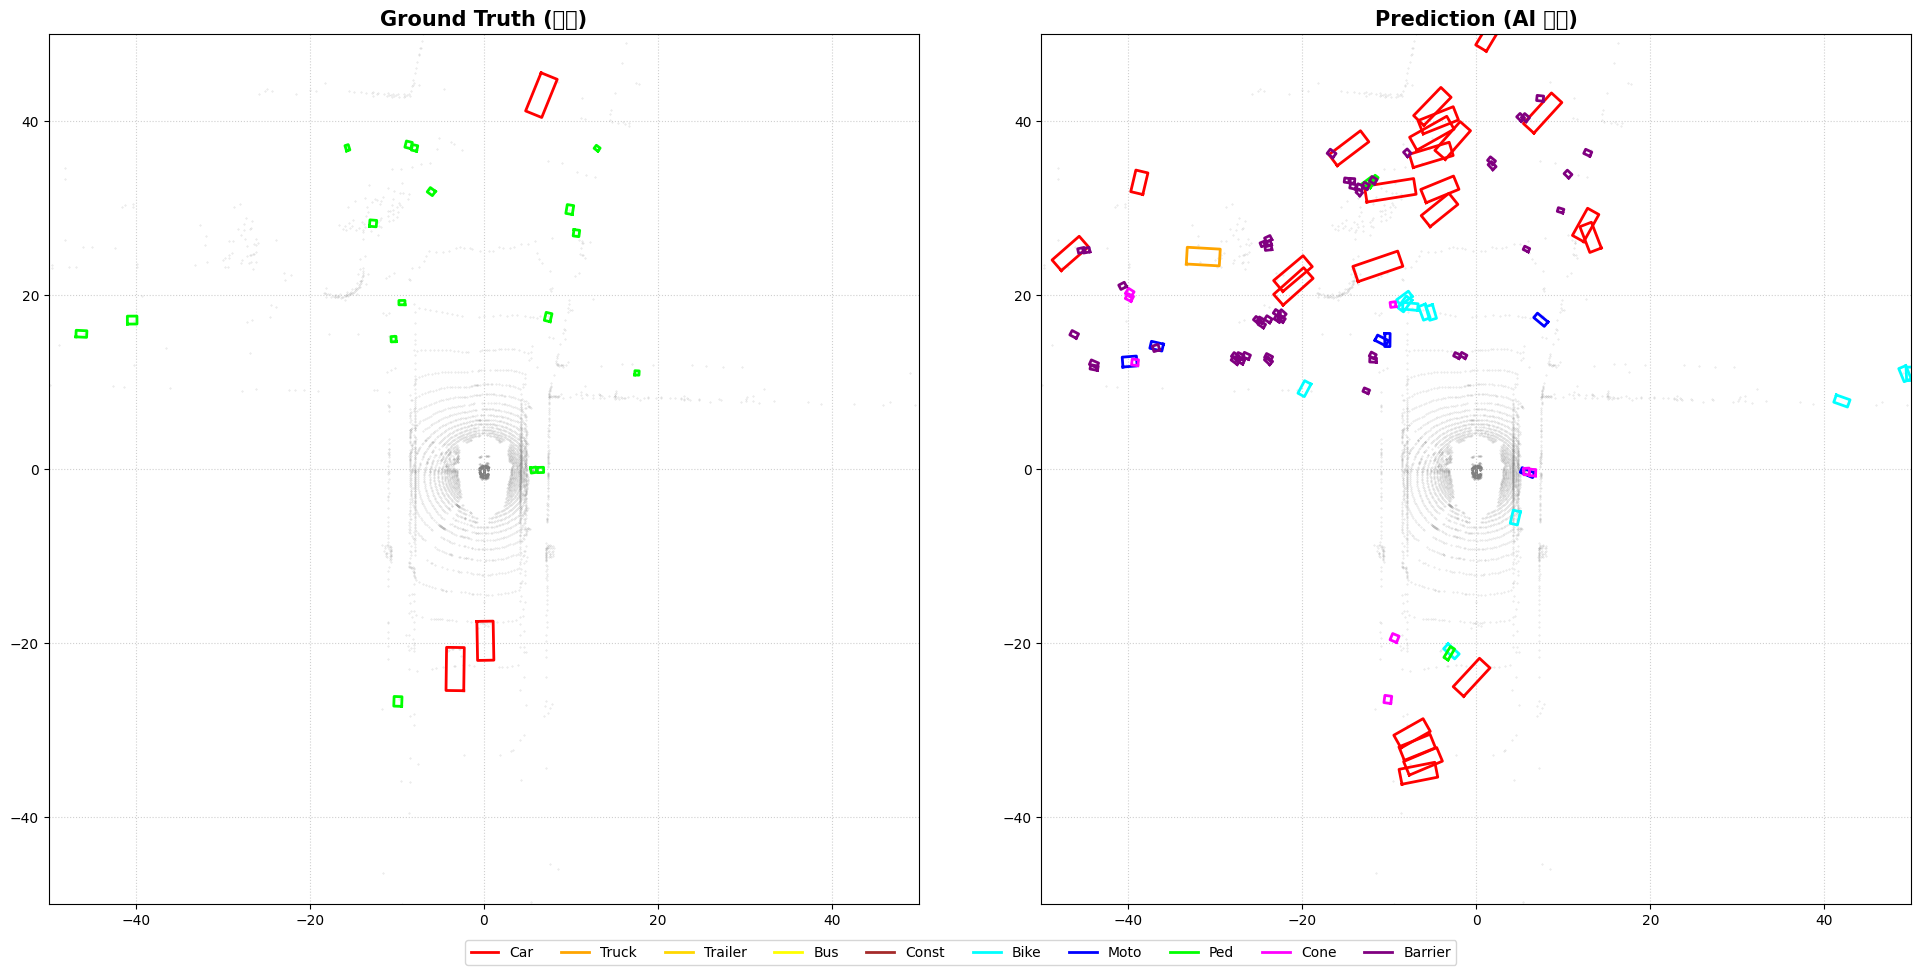

✅ 완료! (GT: 23개, Pred: 101개)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from matplotlib.lines import Line2D

print("=" * 70)
print("📊 2. Detection 결과 시각화 (GT vs Prediction)")
print("=" * 70)

pkl_path = '/content/nuscenes_inference_results.pkl'

if not os.path.exists(pkl_path):
    print("❌ 결과 파일이 없습니다. 1번 코드를 먼저 실행하세요!")
else:
    with open(pkl_path, 'rb') as f:
        results = pickle.load(f)

    token = list(results.keys())[0]
    data = results[token]

    # 5차원 포인트 로드
    points = np.fromfile(data['lidar_path'], dtype=np.float32).reshape(-1, 5)

    # 10개 클래스 색상표
    COLOR_MAP = {
        0: 'red', 1: 'orange', 2: 'gold', 3: 'yellow', 4: 'brown',
        5: 'cyan', 6: 'blue', 7: 'lime', 8: 'magenta', 9: 'purple'
    }
    CLASS_NAMES = ['Car', 'Truck', 'Trailer', 'Bus', 'Const', 'Bike', 'Moto', 'Ped', 'Cone', 'Barrier']

    def draw_box_bev(ax, bbox, color, linestyle='-'):
        x, y, z, dx, dy, dz, rot = bbox[:7]
        corners = np.array([[dx/2, dy/2], [dx/2, -dy/2], [-dx/2, -dy/2], [-dx/2, dy/2]])
        c, s = np.cos(rot), np.sin(rot)
        rot_mat = np.array([[c, -s], [s, c]])
        corners_rot = np.dot(corners, rot_mat.T) + np.array([x, y])
        corners_plot = np.vstack([corners_rot, corners_rot[0]])
        ax.plot(corners_plot[:, 0], corners_plot[:, 1], color=color, linewidth=2, linestyle=linestyle)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    mask = (np.abs(points[:, 0]) < 50) & (np.abs(points[:, 1]) < 50)
    pts = points[mask]

    for ax, title in zip(axes, ['Ground Truth (정답)', 'Prediction (AI 예측)']):
        ax.scatter(pts[::5, 0], pts[::5, 1], s=0.1, c='gray', alpha=0.3)
        ax.set_title(title, fontsize=15, fontweight='bold')
        ax.set_xlim(-50, 50); ax.set_ylim(-50, 50); ax.set_aspect('equal')
        ax.grid(True, linestyle=':', alpha=0.6)

    # GT
    gt_count = 0
    for inst in data['gt_instances']:
        bbox = inst['bbox_3d']
        if isinstance(bbox, list): bbox = np.array(bbox)
        label = inst['bbox_label_3d']
        color = COLOR_MAP.get(label, 'black')
        draw_box_bev(axes[0], bbox, color)
        gt_count += 1

    # Pred
    pred_count = 0
    for i in range(len(data['scores_3d'])):
        if data['scores_3d'][i] > 0.25:
            label = int(data['labels_3d'][i])
            color = COLOR_MAP.get(label, 'black')
            draw_box_bev(axes[1], data['bboxes_3d'][i], color)
            pred_count += 1

    legend_elements = [Line2D([0], [0], color=c, lw=2, label=n) for n, c in zip(CLASS_NAMES, COLOR_MAP.values())]
    fig.legend(handles=legend_elements, loc='lower center', ncol=10, fontsize=10)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])

    save_path = '/content/detection_comparison.png'
    plt.savefig(save_path, dpi=100)
    plt.show()
    print(f"✅ 완료! (GT: {gt_count}개, Pred: {pred_count}개)")

🖼️ 3. 다중 샘플 Prediction 비교


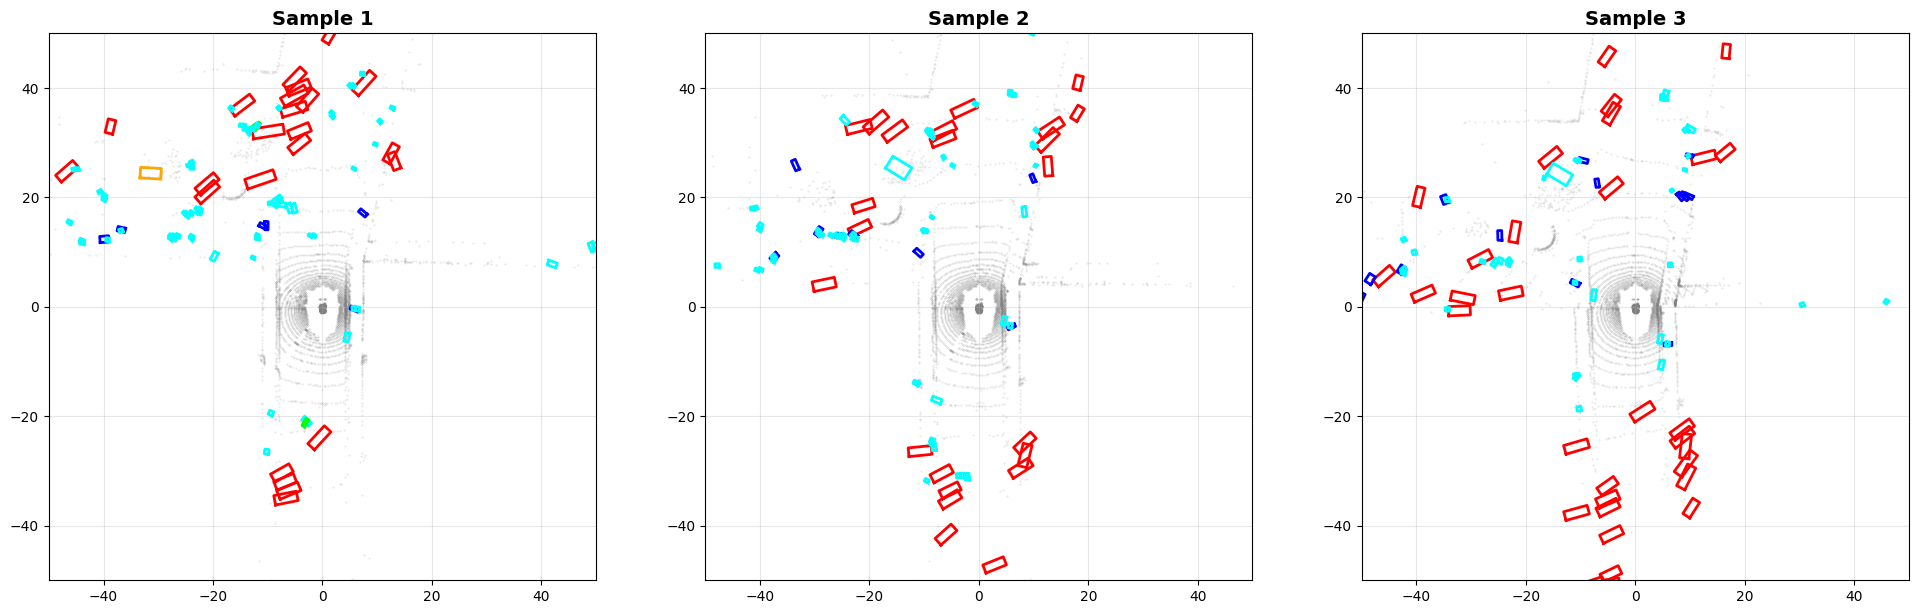

✅ 완료!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

print("=" * 70)
print("🖼️ 3. 다중 샘플 Prediction 비교")
print("=" * 70)

pkl_path = '/content/nuscenes_inference_results.pkl'

if os.path.exists(pkl_path):
    with open(pkl_path, 'rb') as f:
        results = pickle.load(f)

    tokens = list(results.keys())[:3]
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))
    if len(tokens) == 1: axes = [axes]

    COLOR_MAP = {0: 'red', 1: 'orange', 6: 'blue', 7: 'lime'} # 주요 클래스

    for i, token in enumerate(tokens):
        data = results[token]
        points = np.fromfile(data['lidar_path'], dtype=np.float32).reshape(-1, 5)

        ax = axes[i]
        mask = (np.abs(points[:, 0]) < 50) & (np.abs(points[:, 1]) < 50)
        pts = points[mask]
        ax.scatter(pts[::5, 0], pts[::5, 1], s=0.1, c='gray', alpha=0.3)

        for j in range(len(data['scores_3d'])):
            if data['scores_3d'][j] > 0.25:
                x, y, z, dx, dy, dz, rot = data['bboxes_3d'][j][:7]
                corners = np.array([[dx/2, dy/2], [dx/2, -dy/2], [-dx/2, -dy/2], [-dx/2, dy/2]])
                c, s = np.cos(rot), np.sin(rot)
                rot_mat = np.array([[c, -s], [s, c]])
                corners_rot = np.dot(corners, rot_mat.T) + np.array([x, y])
                corners_plot = np.vstack([corners_rot, corners_rot[0]])

                label = int(data['labels_3d'][j])
                color = COLOR_MAP.get(label, 'cyan')
                ax.plot(corners_plot[:, 0], corners_plot[:, 1], color=color, linewidth=2)

        ax.set_title(f"Sample {i+1}", fontsize=14, fontweight='bold')
        ax.set_xlim(-50, 50); ax.set_ylim(-50, 50); ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)

    plt.savefig('/content/multi_sample_vis.png', dpi=100)
    plt.show()
    print(f"✅ 완료!")
else:
    print("❌ 결과 파일이 없습니다.")

#추론후 결과 시각화

In [ ]:
import os
import subprocess

print("=" * 70)
print("📸 LIDAR_TOP 데이터 추론 및 이미지 저장 (Static Image)")
print("=" * 70)

script_content = """
import os
import glob
import numpy as np
import matplotlib
matplotlib.use('Agg') # 화면 출력 없이 파일 저장 모드
import matplotlib.pyplot as plt
import torch
import sys
import random

# 경고 무시
import warnings
warnings.filterwarnings("ignore")

# mmdet3d 경로 추가
sys.path.append('/content/mmdetection3d')

from mmdet3d.apis import init_model, inference_detector
from mmdet3d.utils import register_all_modules

register_all_modules()

# =========================================================
# 1. 모델 준비 (자동 찾기)
# =========================================================
work_dir = '/content/work_dirs'
pth_files = sorted(glob.glob(os.path.join(work_dir, "**", "*.pth"), recursive=True), key=os.path.getmtime)
checkpoint_file = pth_files[-1] if pth_files else None

if not checkpoint_file:
    print("❌ 체크포인트가 없습니다.")
    sys.exit()

candidates = [
    '/content/centerpoint_fixed_config.py',
    '/content/centerpoint_final.py',
    '/content/centerpoint_no_val.py',
    '/content/mmdetection3d/configs/centerpoint/centerpoint_nuscenes_mini.py'
]
config_file = next((c for c in candidates if os.path.exists(c)), None)

print(f"🔹 모델 로드: {os.path.basename(checkpoint_file)}")
try:
    model = init_model(config_file, checkpoint_file, device='cuda:0')
except Exception as e:
    print(f"❌ 모델 로드 실패: {e}")
    sys.exit()

# =========================================================
# 2. LIDAR_TOP 파일 가져오기
# =========================================================
target_dir = "/content/mmdetection3d/data/nuscenes/samples/LIDAR_TOP"
lidar_files = sorted(glob.glob(os.path.join(target_dir, "*bin")))

if not lidar_files:
    print(f"❌ 데이터가 없습니다: {target_dir}")
    sys.exit()

# 랜덤으로 5장만 선택해서 시각화
selected_files = random.sample(lidar_files, 5) if len(lidar_files) > 5 else lidar_files
print(f"🖼️ 총 {len(selected_files)}장의 이미지를 생성합니다...")

# =========================================================
# 3. 시각화 설정
# =========================================================
# 클래스별 색상 (Car=Red, Pedestrian=Lime, Truck=Orange, etc.)
COLOR_MAP = {0: 'red', 1: 'orange', 2: 'yellow', 6: 'cyan', 7: 'lime'}
CLASS_NAMES = ['Car', 'Truck', 'Trailer', 'Bus', 'Const', 'Bike', 'Moto', 'Ped', 'Cone', 'Barrier']

def draw_box_bev(ax, bbox, color, label_text=None):
    x, y, z, dx, dy, dz, rot = bbox[:7]
    c, s = np.cos(rot), np.sin(rot)
    # BEV 코너 좌표 계산
    corners = np.array([[dx/2, dy/2], [dx/2, -dy/2], [-dx/2, -dy/2], [-dx/2, dy/2]])
    rot_mat = np.array([[c, -s], [s, c]])
    corners_rot = np.dot(corners, rot_mat.T) + np.array([x, y])
    corners_plot = np.vstack([corners_rot, corners_rot[0]]) # 닫힌 사각형

    ax.plot(corners_plot[:, 0], corners_plot[:, 1], color=color, linewidth=2)

    # 박스 위에 클래스 이름 표시 (옵션)
    if label_text:
        ax.text(x, y, label_text, color='white', fontsize=8, fontweight='bold',
                bbox=dict(facecolor=color, alpha=0.5, edgecolor='none', pad=1))

# =========================================================
# 4. 추론 및 그리기
# =========================================================
save_dir = '/content/inference_images'
os.makedirs(save_dir, exist_ok=True)

for i, pcd_path in enumerate(selected_files):
    try:
        # 1. 추론
        result, _ = inference_detector(model, pcd_path)
        pred = result.pred_instances_3d
        scores = pred.scores_3d.cpu().numpy()
        bboxes = pred.bboxes_3d.tensor.cpu().numpy()
        labels = pred.labels_3d.cpu().numpy()

        # 2. 시각화 캔버스 (검은 배경)
        fig, ax = plt.subplots(figsize=(12, 12), facecolor='black')
        ax.set_facecolor('black') # 플롯 배경도 검게

        # 3. 포인트 클라우드 그리기 (흰색 점)
        points = np.fromfile(pcd_path, dtype=np.float32).reshape(-1, 5)
        # 50m 반경만 표시
        mask = (np.abs(points[:, 0]) < 50) & (np.abs(points[:, 1]) < 50)
        pts = points[mask]

        # 점 크기를 아주 작게, 흰색으로
        ax.scatter(pts[::3, 0], pts[::3, 1], s=0.3, c='white', alpha=0.7)

        # 4. 예측 박스 그리기
        detect_count = 0
        for j in range(len(scores)):
            if scores[j] > 0.25: # 신뢰도 25% 이상
                lbl_idx = int(labels[j])
                color = COLOR_MAP.get(lbl_idx, 'magenta') # 없으면 마젠타
                cls_name = CLASS_NAMES[lbl_idx] if lbl_idx < len(CLASS_NAMES) else str(lbl_idx)

                draw_box_bev(ax, bboxes[j], color, label_text=None) # 텍스트 빼고 깔끔하게
                detect_count += 1

        # 5. 스타일링
        ax.set_xlim(-50, 50)
        ax.set_ylim(-50, 50)
        ax.set_aspect('equal')
        ax.axis('off') # 축 숨기기

        # 제목 (파일명)
        filename = os.path.basename(pcd_path)
        plt.title(f"Detection Result: {detect_count} objects detected\\n{filename}",
                  color='white', fontsize=12)

        # 6. 저장
        save_name = f"{save_dir}/result_{i+1}.png"
        plt.savefig(save_name, dpi=150, bbox_inches='tight', facecolor='black')
        plt.close(fig)

        print(f"✅ 저장 완료 [{i+1}/5]: {save_name} (객체 {detect_count}개)")

    except Exception as e:
        print(f"⚠️ 에러 발생 ({os.path.basename(pcd_path)}): {e}")

print(f"\\n📂 결과 이미지는 '{save_dir}' 폴더에 저장되었습니다.")
"""

# 가상환경 파이썬으로 실행
env = os.environ.copy()
env['PYTHONPATH'] = '/content/mmdetection3d:' + env.get('PYTHONPATH', '')
env['NUMBA_DISABLE_CUDA'] = '1'

process = subprocess.Popen(
    ['/content/conda/envs/openmmlab/bin/python', '-c', script_content],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    env=env,
    text=True,
    bufsize=1
)

for line in iter(process.stdout.readline, ''):
    print(line, end='', flush=True)
process.wait()

📸 LIDAR_TOP 데이터 추론 및 이미지 저장 (Static Image)
🔹 모델 로드: epoch_80.pth
Loads checkpoint by local backend from path: /content/work_dirs/epoch_80.pth
🖼️ 총 5장의 이미지를 생성합니다...
✅ 저장 완료 [1/5]: /content/inference_images/result_1.png (객체 114개)
✅ 저장 완료 [2/5]: /content/inference_images/result_2.png (객체 73개)
✅ 저장 완료 [3/5]: /content/inference_images/result_3.png (객체 139개)
✅ 저장 완료 [4/5]: /content/inference_images/result_4.png (객체 121개)
✅ 저장 완료 [5/5]: /content/inference_images/result_5.png (객체 102개)

📂 결과 이미지는 '/content/inference_images' 폴더에 저장되었습니다.


0

In [ ]:
import os
import subprocess

print("=" * 70)
print("📸 단일 카메라 투영 시각화 (가상환경 내부 실행)")
print("=" * 70)

script_content = """
import os
import glob
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import cv2
import torch
import sys

# 경고 무시
import warnings
warnings.filterwarnings("ignore")

# mmdet3d 경로 추가
sys.path.append('/content/mmdetection3d')

# 라이브러리 임포트
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box
from pyquaternion import Quaternion
from mmdet3d.apis import init_model, inference_detector
from mmdet3d.utils import register_all_modules

register_all_modules()

# ---------------------------------------------------------
# 1. NuScenes 데이터셋 & 모델 로드
# ---------------------------------------------------------
print("🔹 NuScenes 데이터셋 로드 중...")
try:
    nusc = NuScenes(version='v1.0-mini', dataroot='/content/mmdetection3d/data/nuscenes', verbose=False)
except Exception as e:
    print(f"❌ NuScenes 로드 실패: {e}")
    sys.exit()

work_dir = '/content/work_dirs'
pth_files = sorted(glob.glob(os.path.join(work_dir, "**", "*.pth"), recursive=True), key=os.path.getmtime)
checkpoint_file = pth_files[-1] if pth_files else None

# 설정 파일 찾기
candidates = [
    '/content/centerpoint_fixed_config.py',
    '/content/centerpoint_final.py',
    '/content/centerpoint_no_val.py'
]
config_file = next((c for c in candidates if os.path.exists(c)), None)

print(f"🔹 모델 로드: {os.path.basename(checkpoint_file)}")
model = init_model(config_file, checkpoint_file, device='cuda:0')

# ---------------------------------------------------------
# 2. 샘플 선택 (첫 번째 Scene의 첫 번째 샘플)
# ---------------------------------------------------------
my_scene = nusc.scene[0]
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)

# ---------------------------------------------------------
# 3. 투영 함수 정의
# ---------------------------------------------------------
def get_3d_box_on_image(nusc, sample, detected_boxes):
    lidar_token = sample['data']['LIDAR_TOP']
    cam_token = sample['data']['CAM_FRONT']

    # 데이터 경로
    lidar_path = nusc.get_sample_data(lidar_token)[0]
    cam_path, boxes, cam_intrinsic = nusc.get_sample_data(cam_token)

    # 이미지 읽기
    img = cv2.imread(cam_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 캘리브레이션 정보
    sd_lidar = nusc.get('sample_data', lidar_token)
    cs_lidar = nusc.get('calibrated_sensor', sd_lidar['calibrated_sensor_token'])
    pose_lidar = nusc.get('ego_pose', sd_lidar['ego_pose_token'])

    sd_cam = nusc.get('sample_data', cam_token)
    cs_cam = nusc.get('calibrated_sensor', sd_cam['calibrated_sensor_token'])
    pose_cam = nusc.get('ego_pose', sd_cam['ego_pose_token'])

    # 시각화 준비
    fig = plt.figure(figsize=(16, 9))
    plt.imshow(img)
    plt.axis('off')
    ax = plt.gca()

    # 박스 투영
    for box in detected_boxes:
        if box.score < 0.25: continue # Threshold

        # 좌표 변환: LiDAR -> Ego -> Global -> Ego(Cam) -> Cam

        # 1. LiDAR -> Ego
        box.rotate(Quaternion(cs_lidar['rotation']))
        box.translate(np.array(cs_lidar['translation']))

        # 2. Ego -> Ego (Cam) (동시간대라 가정하고 pose 변환 생략 혹은 적용)
        # 엄밀히는 Ego(Lidar) -> Global -> Ego(Cam) 이지만,
        # timestamp 차이가 미세하므로 바로 Ego -> Cam 변환 시도

        # Ego -> Cam (역변환)
        box.translate(-np.array(cs_cam['translation']))
        box.rotate(Quaternion(cs_cam['rotation']).inverse)

        # 3. 카메라 렌즈 뒤에 있는 것 제외
        if np.any(box.corners()[2, :] < 0.1): continue

        # 4. 그리기
        box.render(ax, view=cam_intrinsic, normalize=True, colors=('r', 'b', 'k'))

    # 저장
    plt.savefig('/content/camera_projection_result.png', bbox_inches='tight', dpi=100)
    plt.close()

# ---------------------------------------------------------
# 4. 실행 (추론 -> 변환 -> 그리기)
# ---------------------------------------------------------
lidar_token = my_sample['data']['LIDAR_TOP']
lidar_path = nusc.get_sample_data(lidar_token)[0]

print(f"🚀 추론 중... {os.path.basename(lidar_path)}")
result, _ = inference_detector(model, lidar_path)

# MMDet3D 결과 -> NuScenes Box 변환
pred_boxes = []
bbox = result.pred_instances_3d.bboxes_3d.tensor.cpu().numpy()
scores = result.pred_instances_3d.scores_3d.cpu().numpy()
labels = result.pred_instances_3d.labels_3d.cpu().numpy()

for i in range(len(scores)):
    # CenterPoint Box: [x, y, z, dx, dy, dz, rot]
    # NuScenes Box: center, size(w,l,h), orientation
    # 주의: MMDet(dx,dy,dz) -> NuScenes(w,l,h) 매핑 확인 필요. 보통 l=dx, w=dy, h=dz

    # 쿼터니언 변환 (Yaw -> Quaternion)
    yaw = bbox[i][6]
    quat = Quaternion(axis=[0, 0, 1], radians=yaw)

    b = Box(
        center=bbox[i][:3],
        size=bbox[i][3:6], # dx, dy, dz
        orientation=quat,
        score=scores[i],
        label=int(labels[i])
    )
    pred_boxes.append(b)

# 투영 및 저장
try:
    get_3d_box_on_image(nusc, my_sample, pred_boxes)
    print("✅ 투영 및 저장 완료: /content/camera_projection_result.png")
except Exception as e:
    print(f"⚠️ 투영 중 오류 발생: {e}")
"""

# 가상환경 파이썬으로 실행
env = os.environ.copy()
env['PYTHONPATH'] = '/content/mmdetection3d:' + env.get('PYTHONPATH', '')
env['NUMBA_DISABLE_CUDA'] = '1'

process = subprocess.Popen(
    ['/content/conda/envs/openmmlab/bin/python', '-c', script_content],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    env=env,
    text=True,
    bufsize=1
)

for line in iter(process.stdout.readline, ''):
    print(line, end='', flush=True)
process.wait()

📸 카메라 투영 시각화 (가상환경 내부 실행)
🔹 NuScenes 데이터셋 로드 중...
🔹 모델 로드: epoch_10.pth
Loads checkpoint by local backend from path: /content/work_dirs/epoch_10.pth
🚀 추론 중... n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin
✅ 투영 및 저장 완료: /content/camera_projection_result.png


0

In [ ]:
import os
import subprocess

print("=" * 70)
print("🎥 카메라 + 라이다 퓨전 영상(GIF) 생성 (가상환경 내부 실행)")
print("=" * 70)

script_content = """
import os
import glob
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import cv2
import imageio
import sys

# 경고 무시
import warnings
warnings.filterwarnings("ignore")

# mmdet3d 경로 추가
sys.path.append('/content/mmdetection3d')

# 라이브러리
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box
from pyquaternion import Quaternion
from mmdet3d.apis import init_model, inference_detector
from mmdet3d.utils import register_all_modules

register_all_modules()

# ---------------------------------------------------------
# 1. 초기 설정
# ---------------------------------------------------------
print("🔹 데이터셋 및 모델 로드 중...")
try:
    nusc = NuScenes(version='v1.0-mini', dataroot='/content/mmdetection3d/data/nuscenes', verbose=False)
except:
    print("❌ NuScenes 로드 실패")
    sys.exit()

work_dir = '/content/work_dirs'
pth_files = sorted(glob.glob(os.path.join(work_dir, "**", "*.pth"), recursive=True), key=os.path.getmtime)
checkpoint_file = pth_files[-1]

# 설정 파일 찾기
candidates = [
    '/content/centerpoint_fixed_config.py',
    '/content/centerpoint_final.py',
    '/content/centerpoint_no_val.py'
]
config_file = next((c for c in candidates if os.path.exists(c)), None)

model = init_model(config_file, checkpoint_file, device='cuda:0')

# ---------------------------------------------------------
# 2. 투영 함수 (핵심 로직)
# ---------------------------------------------------------
def render_fusion_frame(nusc, sample, model):
    # (1) 센서 데이터 경로 가져오기
    lidar_token = sample['data']['LIDAR_TOP']
    cam_token = sample['data']['CAM_FRONT']

    lidar_path = nusc.get_sample_data(lidar_token)[0]
    cam_path, _, cam_intrinsic = nusc.get_sample_data(cam_token)

    # (2) 추론 (Inference)
    result, _ = inference_detector(model, lidar_path)

    # (3) 결과 변환 (MMDet -> NuScenes Box)
    pred_boxes = []
    bbox = result.pred_instances_3d.bboxes_3d.tensor.cpu().numpy()
    scores = result.pred_instances_3d.scores_3d.cpu().numpy()
    labels = result.pred_instances_3d.labels_3d.cpu().numpy()

    for i in range(len(scores)):
        if scores[i] < 0.25: continue # Threshold

        # CenterPoint Box: x, y, z, dx, dy, dz, rot
        quat = Quaternion(axis=[0, 0, 1], radians=bbox[i][6])
        b = Box(center=bbox[i][:3], size=bbox[i][3:6], orientation=quat,
                score=scores[i], label=int(labels[i]))
        pred_boxes.append(b)

    # (4) 캘리브레이션 정보 로드
    sd_lidar = nusc.get('sample_data', lidar_token)
    cs_lidar = nusc.get('calibrated_sensor', sd_lidar['calibrated_sensor_token'])
    sd_cam = nusc.get('sample_data', cam_token)
    cs_cam = nusc.get('calibrated_sensor', sd_cam['calibrated_sensor_token'])

    # (5) 시각화 그리기
    img = cv2.imread(cam_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig = plt.figure(figsize=(16, 9), dpi=80)
    plt.imshow(img)
    plt.axis('off')
    ax = plt.gca()

    # 박스 투영 루프
    for box in pred_boxes:
        # 좌표 변환: LiDAR -> Ego -> Camera
        box.rotate(Quaternion(cs_lidar['rotation']))
        box.translate(np.array(cs_lidar['translation']))
        box.translate(-np.array(cs_cam['translation']))
        box.rotate(Quaternion(cs_cam['rotation']).inverse)

        # 카메라 뒤쪽 제외
        if np.any(box.corners()[2, :] < 0.1): continue

        # 색상: Car=Red(0), Ped=Lime(7), Others=Blue
        c = 'r' if box.label == 0 else ('lime' if box.label == 7 else 'b')

        box.render(ax, view=cam_intrinsic, normalize=True, colors=(c, c, 'k'))

    # 이미지 버퍼로 변환
    fig.canvas.draw()
    image_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image_data = image_data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    return image_data

# ---------------------------------------------------------
# 3. 연속 프레임 처리 (Loop)
# ---------------------------------------------------------
my_scene = nusc.scene[0] # 첫 번째 씬
curr_token = my_scene['first_sample_token']
frames = []
max_frames = 20 # 20장만 생성 (시간 절약)

print(f"🚀 영상 생성 시작 (Scene: {my_scene['name']}, Max: {max_frames} frames)")

for i in range(max_frames):
    if not curr_token: break

    sample = nusc.get('sample', curr_token)
    print(f"   📸 Processing frame {i+1}/{max_frames}...")

    frame_img = render_fusion_frame(nusc, sample, model)
    frames.append(frame_img)

    curr_token = sample['next'] # 다음 장면으로 이동 (Linked List)

# ---------------------------------------------------------
# 4. 저장
# ---------------------------------------------------------
save_path = '/content/camera_fusion_demo.gif'
if frames:
    imageio.mimsave(save_path, frames, fps=4) # 초당 4프레임
    print(f"\\n✅ 퓨전 영상 저장 완료: {save_path}")
else:
    print("\\n❌ 프레임 생성 실패")
"""

# 가상환경 파이썬으로 실행
env = os.environ.copy()
env['PYTHONPATH'] = '/content/mmdetection3d:' + env.get('PYTHONPATH', '')
env['NUMBA_DISABLE_CUDA'] = '1'

process = subprocess.Popen(
    ['/content/conda/envs/openmmlab/bin/python', '-c', script_content],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    env=env,
    text=True,
    bufsize=1
)

for line in iter(process.stdout.readline, ''):
    print(line, end='', flush=True)
process.wait()

🎥 카메라 + 라이다 퓨전 영상(GIF) 생성 (가상환경 내부 실행)
🔹 데이터셋 및 모델 로드 중...
Loads checkpoint by local backend from path: /content/work_dirs/epoch_80.pth
🚀 영상 생성 시작 (Scene: scene-0061, Max: 20 frames)
   📸 Processing frame 1/20...
   📸 Processing frame 2/20...
   📸 Processing frame 3/20...
   📸 Processing frame 4/20...
   📸 Processing frame 5/20...
   📸 Processing frame 6/20...
   📸 Processing frame 7/20...
   📸 Processing frame 8/20...
   📸 Processing frame 9/20...
   📸 Processing frame 10/20...
   📸 Processing frame 11/20...
   📸 Processing frame 12/20...
   📸 Processing frame 13/20...
   📸 Processing frame 14/20...
   📸 Processing frame 15/20...
   📸 Processing frame 16/20...
   📸 Processing frame 17/20...
   📸 Processing frame 18/20...
   📸 Processing frame 19/20...
   📸 Processing frame 20/20...

✅ 퓨전 영상 저장 완료: /content/camera_fusion_demo.gif


0

In [ ]:
import os
import subprocess

print("=" * 70)
print("📸 라이다 추론 결과를 이미지(PNG)로 저장")
print("=" * 70)

script_content = """
import os
import glob
import numpy as np
import matplotlib
matplotlib.use('Agg') # 화면 출력 방지 (파일 저장용)
import matplotlib.pyplot as plt
import torch
import sys
import shutil

# 경고 무시
import warnings
warnings.filterwarnings("ignore")

# mmdet3d 경로 추가
sys.path.append('/content/mmdetection3d')

from mmdet3d.apis import init_model, inference_detector
from mmdet3d.utils import register_all_modules

register_all_modules()

# ---------------------------------------------------------
# 1. 모델 준비
# ---------------------------------------------------------
work_dir = '/content/work_dirs'
pth_files = sorted(glob.glob(os.path.join(work_dir, "**", "*.pth"), recursive=True), key=os.path.getmtime)
checkpoint_file = pth_files[-1] if pth_files else None

if not checkpoint_file:
    print("❌ 체크포인트가 없습니다.")
    sys.exit()

candidates = [
    '/content/centerpoint_fixed_config.py',
    '/content/centerpoint_final.py',
    '/content/centerpoint_no_val.py'
]
config_file = next((c for c in candidates if os.path.exists(c)), None)

print(f"🔹 모델 로드: {os.path.basename(checkpoint_file)}")
model = init_model(config_file, checkpoint_file, device='cuda:0')

# ---------------------------------------------------------
# 2. 데이터 준비
# ---------------------------------------------------------
target_dir = "/content/mmdetection3d/data/nuscenes/samples/LIDAR_TOP"
save_dir = "/content/inference_images"

# 저장 폴더 초기화
if os.path.exists(save_dir):
    shutil.rmtree(save_dir)
os.makedirs(save_dir, exist_ok=True)

lidar_files = sorted(glob.glob(os.path.join(target_dir, "*bin")))
process_files = lidar_files[:20] # 20장만 처리 (원하면 숫자 변경 가능)

print(f"🖼️ 총 {len(process_files)}장의 이미지를 생성합니다...")

# ---------------------------------------------------------
# 3. 시각화 함수
# ---------------------------------------------------------
COLOR_MAP = {0: 'red', 1: 'orange', 6: 'blue', 7: 'lime'} # Car, Truck, Moto, Ped

def draw_box_bev(ax, bbox, color):
    x, y, z, dx, dy, dz, rot = bbox[:7]
    # BEV 코너 좌표 계산
    corners = np.array([[dx/2, dy/2], [dx/2, -dy/2], [-dx/2, -dy/2], [-dx/2, dy/2]])
    c, s = np.cos(rot), np.sin(rot)
    rot_mat = np.array([[c, -s], [s, c]])
    corners_rot = np.dot(corners, rot_mat.T) + np.array([x, y])
    corners_plot = np.vstack([corners_rot, corners_rot[0]]) # 닫힌 박스

    ax.plot(corners_plot[:, 0], corners_plot[:, 1], color=color, linewidth=2)
    # 방향 표시 (헤딩)
    front_center = (corners_rot[0] + corners_rot[3]) / 2
    ax.plot([x, front_center[0]], [y, front_center[1]], color=color, linewidth=1)

# ---------------------------------------------------------
# 4. 루프 실행
# ---------------------------------------------------------
for idx, pcd_path in enumerate(process_files):
    try:
        # 추론
        result, _ = inference_detector(model, pcd_path)
        pred = result.pred_instances_3d
        scores = pred.scores_3d.cpu().numpy()
        bboxes = pred.bboxes_3d.tensor.cpu().numpy()
        labels = pred.labels_3d.cpu().numpy()

        # 캔버스 생성 (검은 배경)
        fig, ax = plt.subplots(figsize=(12, 12), facecolor='black')
        ax.set_facecolor('black')

        # 포인트 클라우드 로드
        points = np.fromfile(pcd_path, dtype=np.float32).reshape(-1, 5)

        # 범위 제한 (-50m ~ 50m)
        mask = (np.abs(points[:, 0]) < 50) & (np.abs(points[:, 1]) < 50)
        pts = points[mask]

        # 포인트 그리기 (흰색)
        ax.scatter(pts[::2, 0], pts[::2, 1], s=0.5, c='white', alpha=0.5)

        # 박스 그리기
        obj_count = 0
        for i in range(len(scores)):
            if scores[i] > 0.25: # 임계값
                label = int(labels[i])
                color = COLOR_MAP.get(label, 'cyan') # 기타는 하늘색
                draw_box_bev(ax, bboxes[i], color)
                obj_count += 1

        # 스타일링
        ax.set_xlim(-50, 50)
        ax.set_ylim(-50, 50)
        ax.set_aspect('equal')
        ax.axis('off')

        filename = os.path.basename(pcd_path)
        plt.title(f"Detected: {obj_count} objects\\n{filename}", color='white', fontsize=10)

        # 저장
        save_name = os.path.join(save_dir, f"result_{idx:03d}.png")
        plt.savefig(save_name, dpi=100, bbox_inches='tight', facecolor='black')
        plt.close(fig)

        print(f"   ✅ 저장: {os.path.basename(save_name)} (객체 {obj_count}개)")

    except Exception as e:
        print(f"⚠️ 에러 ({idx}): {e}")

# 5. 압축하기
shutil.make_archive('/content/inference_results', 'zip', save_dir)
print(f"\\n📦 압축 완료: /content/inference_results.zip")
"""

# 실행
env = os.environ.copy()
env['PYTHONPATH'] = '/content/mmdetection3d:' + env.get('PYTHONPATH', '')
env['NUMBA_DISABLE_CUDA'] = '1'

process = subprocess.Popen(
    ['/content/conda/envs/openmmlab/bin/python', '-c', script_content],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    env=env,
    text=True,
    bufsize=1
)

for line in iter(process.stdout.readline, ''):
    print(line, end='', flush=True)
process.wait()

📸 라이다 추론 결과를 이미지(PNG)로 저장
🔹 모델 로드: epoch_80.pth
Loads checkpoint by local backend from path: /content/work_dirs/epoch_80.pth
🖼️ 총 20장의 이미지를 생성합니다...
   ✅ 저장: result_000.png (객체 101개)
   ✅ 저장: result_001.png (객체 87개)
   ✅ 저장: result_002.png (객체 84개)
   ✅ 저장: result_003.png (객체 112개)
   ✅ 저장: result_004.png (객체 98개)
   ✅ 저장: result_005.png (객체 96개)
   ✅ 저장: result_006.png (객체 105개)
   ✅ 저장: result_007.png (객체 94개)
   ✅ 저장: result_008.png (객체 101개)
   ✅ 저장: result_009.png (객체 86개)
   ✅ 저장: result_010.png (객체 112개)
   ✅ 저장: result_011.png (객체 117개)
   ✅ 저장: result_012.png (객체 111개)
   ✅ 저장: result_013.png (객체 100개)
   ✅ 저장: result_014.png (객체 96개)
   ✅ 저장: result_015.png (객체 98개)
   ✅ 저장: result_016.png (객체 92개)
   ✅ 저장: result_017.png (객체 65개)
   ✅ 저장: result_018.png (객체 81개)
   ✅ 저장: result_019.png (객체 86개)

📦 압축 완료: /content/inference_results.zip


0

#모델 저장

In [ ]:
import os

print("=" * 70)
print("🛠️ Config 파일 수정 (KeyError 해결)")
print("=" * 70)

# 저장할 경로 (기존 파일 덮어쓰기)
config_dir = '/content/mmdetection3d/configs/centerpoint'
CFG_DST = os.path.join(config_dir, 'centerpoint_nus_l4.py')

# Config 내용 작성
config_content = """
# 1. Base Config 상속
_base_ = [
    '/content/mmdetection3d/configs/_base_/datasets/nus-3d.py',
    '/content/mmdetection3d/configs/_base_/schedules/cyclic-20e.py',
    '/content/mmdetection3d/configs/_base_/default_runtime.py'
]

# 2. 모델 설정
voxel_size = [0.075, 0.075, 0.2]
point_cloud_range = [-54.0, -54.0, -5.0, 54.0, 54.0, 3.0]

model = dict(
    type='CenterPoint',
    data_preprocessor=dict(
        type='Det3DDataPreprocessor',
        voxel=True,
        voxel_layer=dict(
            max_num_points=10,
            point_cloud_range=point_cloud_range,
            voxel_size=voxel_size,
            max_voxels=(90000, 120000))),
    pts_voxel_encoder=dict(type='HardSimpleVFE', num_features=5),
    pts_middle_encoder=dict(
        type='SparseEncoder',
        in_channels=5,
        sparse_shape=[41, 1440, 1440],
        output_channels=128,
        order=('conv', 'norm', 'act'),
        encoder_channels=((16, 16, 32), (32, 32, 64), (64, 64, 128), (128, 128)),
        encoder_paddings=((0, 0, 1), (0, 0, 1), (0, 0, [0, 1, 1]), (0, 0)),
        block_type='basicblock'),
    pts_backbone=dict(
        type='SECOND',
        in_channels=256,
        out_channels=[128, 256],
        layer_nums=[5, 5],
        layer_strides=[1, 2],
        norm_cfg=dict(type='BN', eps=1e-3, momentum=0.01),
        conv_cfg=dict(type='Conv2d', bias=False)),
    pts_neck=dict(
        type='SECONDFPN',
        in_channels=[128, 256],
        out_channels=[256, 256],
        upsample_strides=[1, 2],
        norm_cfg=dict(type='BN', eps=1e-3, momentum=0.01),
        upsample_cfg=dict(type='deconv', bias=False),
        use_conv_for_no_stride=True),
    pts_bbox_head=dict(
        type='CenterHead',
        in_channels=512,
        tasks=[
            dict(num_class=1, class_names=['car']),
            dict(num_class=2, class_names=['truck', 'construction_vehicle']),
            dict(num_class=2, class_names=['bus', 'trailer']),
            dict(num_class=1, class_names=['barrier']),
            dict(num_class=2, class_names=['motorcycle', 'bicycle']),
            dict(num_class=2, class_names=['pedestrian', 'traffic_cone']),
        ],
        common_heads=dict(
            reg=(2, 2), height=(1, 2), dim=(3, 2), rot=(2, 2), vel=(2, 2)),
        share_conv_channel=64,
        bbox_coder=dict(
            type='CenterPointBBoxCoder',
            pc_range=point_cloud_range[:2],
            post_center_range=[-61.2, -61.2, -10.0, 61.2, 61.2, 10.0],
            max_num=500,
            score_threshold=0.1,
            out_size_factor=8,
            voxel_size=voxel_size[:2],
            code_size=9),
        separate_head=dict(
            type='SeparateHead', init_bias=-2.19, final_kernel=3),
        loss_cls=dict(type='mmdet.GaussianFocalLoss', reduction='mean'),
        loss_bbox=dict(type='mmdet.L1Loss', reduction='mean', loss_weight=0.25),
        norm_bbox=True),
    train_cfg=dict(
        pts=dict(
            point_cloud_range=point_cloud_range,
            grid_size=[1440, 1440, 40],
            voxel_size=voxel_size,
            out_size_factor=8,
            dense_reg=1,
            gaussian_overlap=0.1,
            max_objs=500,
            min_radius=2,
            code_weights=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2])),
    # ====================================================================
    # [수정됨] post_center_limit_range 키 이름 수정 (KeyError 해결)
    # ====================================================================
    test_cfg=dict(
        pts=dict(
            pc_range=point_cloud_range[:2],
            post_center_limit_range=[-61.2, -61.2, -10.0, 61.2, 61.2, 10.0],
            max_per_img=500,
            max_pool_nms=False,
            min_radius=[4, 12, 10, 1, 0.85, 0.175],
            score_threshold=0.1,
            out_size_factor=8,
            voxel_size=voxel_size[:2],
            nms_type='rotate',
            pre_max_size=1000,
            post_max_size=83,
            nms_thr=0.2)))

# 3. 데이터 경로 및 파이프라인
data_root = '/content/mmdetection3d/data/nuscenes/'
input_modality = dict(use_lidar=True, use_camera=False)
backend_args = None

train_pipeline = [
    dict(type='LoadPointsFromFile', coord_type='LIDAR', load_dim=5, use_dim=5),
    dict(type='LoadPointsFromMultiSweeps', sweeps_num=9, use_dim=[0, 1, 2, 3, 4], pad_empty_sweeps=True, remove_close=True),
    dict(type='LoadAnnotations3D', with_bbox_3d=True, with_label_3d=True),
    dict(type='ObjectSample', db_sampler=dict(
        data_root=data_root,
        info_path=data_root + 'nuscenes_dbinfos_train.pkl',
        rate=1.0,
        prepare=dict(
            filter_by_difficulty=[-1],
            filter_by_min_points=dict(
                car=5, truck=5, bus=5, trailer=5, construction_vehicle=5,
                traffic_cone=5, barrier=5, motorcycle=5, bicycle=5, pedestrian=5)),
        classes=['car', 'truck', 'construction_vehicle', 'bus', 'trailer', 'barrier', 'motorcycle', 'bicycle', 'pedestrian', 'traffic_cone'],
        sample_groups=dict(
            car=2, truck=3, construction_vehicle=7, bus=4, trailer=6,
            barrier=2, motorcycle=6, bicycle=6, pedestrian=2, traffic_cone=2),
        points_loader=dict(
            type='LoadPointsFromFile', coord_type='LIDAR', load_dim=5, use_dim=[0, 1, 2, 3, 4]))),
    dict(type='GlobalRotScaleTrans',
        rot_range=[-0.3925, 0.3925],
        scale_ratio_range=[0.95, 1.05],
        translation_std=[0, 0, 0]),
    dict(type='RandomFlip3D', flip_ratio_bev_horizontal=0.5),
    dict(type='PointsRangeFilter', point_cloud_range=point_cloud_range),
    dict(type='ObjectRangeFilter', point_cloud_range=point_cloud_range),
    dict(type='ObjectNameFilter', classes=['car', 'truck', 'construction_vehicle', 'bus', 'trailer', 'barrier', 'motorcycle', 'bicycle', 'pedestrian', 'traffic_cone']),
    dict(type='PointShuffle'),
    dict(type='Pack3DDetInputs', keys=['points', 'gt_bboxes_3d', 'gt_labels_3d'])
]

test_pipeline = [
    dict(type='LoadPointsFromFile', coord_type='LIDAR', load_dim=5, use_dim=5),
    dict(type='LoadPointsFromMultiSweeps', sweeps_num=9, use_dim=[0, 1, 2, 3, 4], pad_empty_sweeps=True, remove_close=True),
    dict(type='Pack3DDetInputs', keys=['points'])
]

train_dataloader = dict(
    batch_size=4,
    num_workers=4,
    dataset=dict(
        type='NuScenesDataset',
        data_root=data_root,
        ann_file='nuscenes_infos_train.pkl',
        pipeline=train_pipeline,
        metainfo=dict(classes=['car', 'truck', 'trailer', 'bus', 'construction_vehicle', 'bicycle', 'motorcycle', 'pedestrian', 'traffic_cone', 'barrier']),
        modality=input_modality,
        test_mode=False,
        box_type_3d='LiDAR',
        backend_args=backend_args,
    ))

val_dataloader = dict(
    batch_size=1,
    num_workers=1,
    dataset=dict(
        type='NuScenesDataset',
        data_root=data_root,
        ann_file='nuscenes_infos_val.pkl',
        pipeline=test_pipeline,
        metainfo=dict(classes=['car', 'truck', 'trailer', 'bus', 'construction_vehicle', 'bicycle', 'motorcycle', 'pedestrian', 'traffic_cone', 'barrier']),
        modality=input_modality,
        test_mode=True,
        box_type_3d='LiDAR',
        backend_args=backend_args,
    ))

test_dataloader = val_dataloader

optim_wrapper = dict(
    type='AmpOptimWrapper',
    optimizer=dict(type='AdamW', lr=0.0001, weight_decay=0.01),
    clip_grad=dict(max_norm=35, norm_type=2))
"""

with open(CFG_DST, 'w') as f:
    f.write(config_content)

print(f"✅ Config 파일 수정 완료: {CFG_DST}")

🛠️ Config 파일 수정 (KeyError 해결)
✅ Config 파일 수정 완료: /content/mmdetection3d/configs/centerpoint/centerpoint_nus_l4.py


In [ ]:
import os
import subprocess
import glob
import shutil

print("=" * 70)
print("📝 NuScenes 평가 결과 JSON 생성 (재시도)")
print("=" * 70)

# 1. 환경 설정
py_path = '/content/conda/envs/openmmlab/bin/python'
mmdet3d_root = '/content/mmdetection3d'
work_dir_root = '/content/work_dirs'
target_config = os.path.join(mmdet3d_root, 'configs/centerpoint/centerpoint_nus_l4.py')

# 2. 최신 모델 찾기
pth_files = sorted(glob.glob(os.path.join(work_dir_root, "**", "*.pth"), recursive=True), key=os.path.getmtime)

if pth_files and os.path.exists(target_config):
    checkpoint = pth_files[-1]
    config_file = target_config

    print(f"📁 모델: {os.path.basename(checkpoint)}")
    print(f"📄 설정: {os.path.basename(config_file)}")

    # 3. 결과 파일 경로
    json_prefix = os.path.join(work_dir_root, 'results_nusc')
    print(f"💾 결과 저장 Prefix: {json_prefix}")

    # 4. 명령어 실행
    cmd = [
        py_path, '-u',
        os.path.join(mmdet3d_root, 'tools/test.py'),
        config_file,
        checkpoint,
        '--cfg-options',
        f'test_evaluator.jsonfile_prefix={json_prefix}',
        'test_evaluator.data_root=/content/mmdetection3d/data/nuscenes/',
        'test_evaluator.ann_file=/content/mmdetection3d/data/nuscenes/nuscenes_infos_val.pkl'
    ]

    env = os.environ.copy()
    env['PYTHONPATH'] = f"{mmdet3d_root}:{env.get('PYTHONPATH', '')}"
    env['NUMBA_DISABLE_CUDA'] = '1'

    print("\n🚀 추론 시작... (약 1~3분 소요)")
    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, env=env, text=True, bufsize=1)

    for line in iter(process.stdout.readline, ''):
        print(line, end='', flush=True)
    process.wait()

    # 5. 결과 확인 및 복사
    found_files = glob.glob(json_prefix + '*.json')
    if found_files:
        generated_file = found_files[0]
        dest_path = '/content/submission_results.json'
        shutil.copy(generated_file, dest_path)
        print(f"\n🎉 성공! 결과 파일 생성됨: {dest_path}")
    else:
        print("\n❌ 실패. 로그를 확인하세요.")
else:
    print("❌ 모델 또는 설정 파일을 찾을 수 없습니다.")

📝 NuScenes 평가 결과 JSON 생성 (재시도)
📁 모델: epoch_20.pth
📄 설정: centerpoint_nus_l4.py
💾 결과 저장 Prefix: /content/work_dirs/results_nusc

🚀 추론 시작... (약 1~3분 소요)
/content/conda/envs/openmmlab/lib/python3.10/site-packages/torch/utils/cpp_extension.py:28: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging  # type: ignore[attr-defined]
01/14 06:53:45 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 384769715
    GPU 0: NVIDIA L4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.5, V12.5.82
    GCC: gcc (Ubuntu 11

In [ ]:
import os
import shutil
import glob
import zipfile
from google.colab import drive
from datetime import datetime

print("=" * 70)
print("📦 학습 패키지(모델+설정+결과) 압축 및 드라이브 저장")
print("=" * 70)

# 1. 구글 드라이브 마운트
if not os.path.exists('/content/drive'):
    print("📂 구글 드라이브 연결 중...")
    drive.mount('/content/drive')

# 2. 저장할 폴더 만들기 (내 드라이브/CenterPoint_Result_날짜)
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
drive_save_dir = f'/content/drive/MyDrive/CenterPoint_Result_{timestamp}'
os.makedirs(drive_save_dir, exist_ok=True)

# 3. 핵심 파일 3종 찾기
files_found = {}

# (1) 모델 파일 (.pth) - 가장 최신 것 찾기
# work_dirs와 mmdetection3d/work_dirs 두 곳 모두 검색 (혹시 모를 경로 차이 대비)
search_dirs = ['/content/work_dirs', '/content/mmdetection3d/work_dirs']
pth_candidates = []

for d in search_dirs:
    pth_candidates.extend(glob.glob(os.path.join(d, "**", "*.pth"), recursive=True))

if pth_candidates:
    # 수정 시간 순으로 정렬하여 가장 마지막(최신) 파일 선택
    latest_pth = sorted(pth_candidates, key=os.path.getmtime)[-1]
    files_found['latest_model.pth'] = latest_pth
    print(f"✅ 모델 발견: {os.path.basename(latest_pth)}")
else:
    print("⚠️ 모델 파일(.pth)을 찾을 수 없습니다.")

# (2) 설정 파일 (.py)
# 우리가 만들었던 'centerpoint_nus_l4.py'를 우선적으로 찾습니다.
config_candidates = [
    '/content/mmdetection3d/configs/centerpoint/centerpoint_nus_l4.py', # 1순위
    '/content/mmdetection3d/configs/centerpoint/my_centerpoint_l4.py'    # 2순위
]
config_file = next((c for c in config_candidates if os.path.exists(c)), None)

if config_file:
    files_found['config.py'] = config_file
    print(f"✅ 설정 발견: {os.path.basename(config_file)}")
else:
    print("⚠️ 설정 파일(.py)을 찾을 수 없습니다.")

# (3) 결과 파일 (.json)
# 이전 단계에서 복사해둔 'submission_results.json'을 찾습니다.
json_candidates = [
    '/content/submission_results.json',           # 1순위 (추천 경로)
    '/content/results_nusc.json',                 # 2순위
    '/content/work_dirs/results_nusc.json'        # 3순위
]

# 후보군에 없으면 work_dirs 내부 검색
if not any(os.path.exists(c) for c in json_candidates):
    found = glob.glob(f"/content/work_dirs/**/*.json", recursive=True)
    # .pts_bbox.json이나 submission.json이 포함된 파일 찾기
    found = [f for f in found if 'pts_bbox' in f or 'submission' in f]
    if found:
        json_candidates.insert(0, max(found, key=os.path.getmtime))

json_file = next((c for c in json_candidates if os.path.exists(c)), None)

if json_file:
    files_found['submission.json'] = json_file
    print(f"✅ 결과 발견: {os.path.basename(json_file)}")
else:
    print("⚠️ 결과 JSON 파일을 찾을 수 없습니다.")

# 4. 압축 파일 생성
if files_found:
    zip_filename = f"CenterPoint_Submission_{timestamp}.zip"
    local_zip_path = os.path.join('/content', zip_filename)

    print(f"\n🗜️ 압축 시작: {zip_filename}")
    with zipfile.ZipFile(local_zip_path, 'w') as zipf:
        for name, path in files_found.items():
            print(f"   ➕ 포함: {name} (원본: {os.path.basename(path)})")
            zipf.write(path, arcname=name)

    # 5. 드라이브로 복사
    if os.path.exists(local_zip_path):
        dest_path = os.path.join(drive_save_dir, zip_filename)
        shutil.copy(local_zip_path, dest_path)

        print(f"\n🎉 저장 완료!")
        print(f"📂 구글 드라이브 경로: {drive_save_dir}/{zip_filename}")
        print("👉 이제 드라이브에서 다운로드하여 제출하시면 됩니다.")
    else:
        print("\n❌ 압축 파일 생성 실패.")
else:
    print("\n❌ 저장할 파일이 하나도 발견되지 않았습니다. 경로를 확인해주세요.")

📦 학습 패키지(모델+설정+결과) 압축 및 드라이브 저장
✅ 모델 발견: epoch_20.pth
✅ 설정 발견: centerpoint_nus_l4.py
⚠️ 결과 JSON 파일을 찾을 수 없습니다.

🗜️ 압축 시작: CenterPoint_Submission_20260114_0655.zip
   ➕ 포함: latest_model.pth (원본: epoch_20.pth)
   ➕ 포함: config.py (원본: centerpoint_nus_l4.py)

🎉 저장 완료!
📂 구글 드라이브 경로: /content/drive/MyDrive/CenterPoint_Result_20260114_0655/CenterPoint_Submission_20260114_0655.zip
👉 이제 드라이브에서 다운로드하여 제출하시면 됩니다.
